<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Project 1 Rubric

### Requirements

1. You need to perform an exhaustive exploration of your dataset.
2. Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
3. You need to define functions (no matter how complicated they are)
4. You don't need to do any modeling

    1. Load and clean, if neccessary, the data with pandas.
    2. Describe the data and investigate any outliers.
    3. Explore relationships between the variables.
    4. Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
    5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. 

5. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

In [1]:
import pandas as pd
from pandas import Series 
import numpy as np
import scipy.stats as stats


import matplotlib.pyplot as plt 
import plotly.plotly as py
import plotly.tools as tls

import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import datetime

In [2]:
#Import Data
df = pd.read_stata('/Users/shaniselukie/Desktop/Project1.dta')

Data: "A Comprehensive Look at The Empirical Performance of Equity Premium Prediction", Ivo Welch and Amit Goyal 

Paper: "A Switching Model with Flexible Threshold Variable: With an Application to Nonlinear Dynamics in Stock Returns" 
This paper proposes a simple extension to threshold models by letting the threshold variable be a linear combination of a set of variables with unknown coefficients. The authors consider an application of US stock returns to predict excess returns using the variables listed below. The following output is an exploratory analysis of the time serires data. 

Variables:
-Bond Data (Cyclical variation in risk premium shocks)
AAA: AAA rated corporate bonds
BAA: BAA rated corporate bonds 
def: Default premium, difference between the yields on the AAA and BAA rated corporate bonds, multiplied by 100 

-Excess Returns 
rho: Excess returns, calculated as the difference between the continuously compouted return from the S&P 500 and the benchmark T-Bill rate, multiplied by 100.  
CRSP_SPvw: Center for Research in Security Press (CRSP) month end values. Stock returns are the continously compounded returns on the S&P 500 index, including dividends. (Value weighted index) 
Rfree: Treasury Bill Rate
i: Three month Treasury Bill Rate

-Time Varying Expected Returns
D12: Dividends are 12 month moving sums of dividends paid on the S&P 500 index
yield: Dividend yield calculated as (D12/Index)*100
Index: S&P 500 index 

-Industrial Production and Composite Leading Indices 
CLI: Composite Leading Indicator is an index used to predict the direction of global economic movements. By looking at it in relation to business cycles and general economic conditions, investors and business can form expectations about what is ahead, and make better-informed decisions. It is made up of 10 economic components: Avg weekly hours worked by manufacturing workers, average number of initial applications for unemployment insurance, amount of manufacturers' new orders for consumer goods and materials, speed of delivery of new merchandise to vendors from suppliers, amount of new orders for capital goods unrelated to defense, amount of new building permits for residential buildings, S&P 500 stock index, inflation-adjusted monetary supply, spread between long and short interest rate and consumer sentiment. 

IPI: Industrial Production Index is an economic indicator that measures the amount of output from the manufacturing, mining, electric and gas industries. The reference year for thte index is 2002 and a level of 100. Investors can use the IPI to examine the growth. 

In [3]:
#Summary Statistics 
df.describe()

,Index,D12,AAA,BAA,Rfree,CRSP_SPvw,IPI,CLI,rho,i,def,yield
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,522.366762,11.192150,0.069965,0.079874,0.003820,0.009103,61.950563,100.011609,0.528340,4.583507,0.990874,3.053281
std,563.751669,9.801369,0.026481,0.029075,0.002562,0.042073,27.244625,1.435102,4.221662,3.074872,0.445582,1.110229
min,36.580000,1.546670,0.029300,0.034500,0.000008,-0.215795,19.926500,94.597700,-22.090334,0.010000,0.320000,1.084550
25%,92.002500,3.092497,0.046175,0.053800,0.002173,-0.015389,39.354875,99.343440,-1.928733,2.607500,0.707500,2.042759
50%,189.090000,7.756665,0.069250,0.078450,0.003817,0.012023,56.856750,100.219300,0.826867,4.580000,0.870000,3.039133
75%,1043.037500,16.153750,0.085500,0.094950,0.005085,0.036346,91.829175,100.910425,3.235267,6.102500,1.180000,3.710226
max,2107.389893,43.380000,0.154900,0.171800,0.013583,0.168113,106.686800,103.407700,16.189632,16.299999,3.380000,6.371584


In [4]:
#df.isnull()

In [5]:
#Format Time 
df.time = pd.to_datetime(df.time).dt.strftime('%m/%Y')
df.time.head()


0    01/1955
1    02/1955
2    03/1955
3    04/1955
4    05/1955
Name: time, dtype: object

In [6]:
#Index Time 
df.index = df['time']
del df['time']
df.head()

,Index,D12,AAA,BAA,Rfree,CRSP_SPvw,IPI,CLI,rho,i,def,yield
time,,,,,,,,,,,,
01/1955,36.63,1.54667,0.0293,0.0345,0.001017,0.018076,20.0383,101.2893,1.705933,1.22,0.52,4.222414
02/1955,36.76,1.55333,0.0293,0.0347,0.000975,0.013526,20.2898,101.6417,1.255100,1.17,0.54,4.225598
03/1955,36.58,1.56000,0.0302,0.0348,0.001067,-0.002242,20.7649,101.9342,-0.330867,1.28,0.46,4.264626
04/1955,37.96,1.56333,0.0301,0.0349,0.001325,0.039843,21.0165,102.1418,3.851800,1.59,0.48,4.118361
05/1955,37.91,1.56667,0.0304,0.0350,0.001208,0.006433,21.3518,102.2666,0.522467,1.45,0.46,4.132604


In [8]:
#Variance
df.var()

Index        317815.944097
D12              96.066826
AAA               0.000701
BAA               0.000845
Rfree             0.000007
CRSP_SPvw         0.001770
IPI             742.269580
CLI               2.059517
rho              17.822432
i                 9.454845
def               0.198543
yield             1.232608
dtype: float64

In [9]:
#Correlation Matrix 
df.corr()

,Index,D12,AAA,BAA,Rfree,CRSP_SPvw,IPI,CLI,rho,i,def,yield
Index,1.000000,0.951055,-0.317786,-0.291429,-0.500729,-0.002638,0.918944,0.007820,0.027763,-0.500729,-0.013034,-0.761099
D12,0.951055,1.000000,-0.238911,-0.197730,-0.470362,-0.015934,0.911971,-0.075370,0.012669,-0.470362,0.129618,-0.622741
AAA,-0.317786,-0.238911,1.000000,0.991477,0.859087,0.001265,-0.034497,-0.183724,-0.050883,0.859087,0.526616,0.539933
BAA,-0.291429,-0.197730,0.991477,1.000000,0.826297,0.007870,-0.009313,-0.251389,-0.042310,0.826297,0.632878,0.548283
Rfree,-0.500729,-0.470362,0.859087,0.826297,1.000000,-0.025664,-0.293342,-0.054237,-0.086273,1.000000,0.286225,0.633845
CRSP_SPvw,-0.002638,-0.015934,0.001265,0.007870,-0.025664,1.000000,-0.023756,-0.011175,0.998157,-0.025664,0.043837,-0.036953
IPI,0.918944,0.911971,-0.034497,-0.009313,-0.293342,-0.023756,1.000000,-0.072208,-0.005871,-0.293342,0.144251,-0.668604
CLI,0.007820,-0.075370,-0.183724,-0.251389,-0.054237,-0.011175,-0.072208,1.000000,-0.007845,-0.054237,-0.548505,-0.180010
rho,0.027763,0.012669,-0.050883,-0.042310,-0.086273,0.998157,-0.005871,-0.007845,1.000000,-0.086273,0.026315,-0.075299
i,-0.500729,-0.470362,0.859087,0.826297,1.000000,-0.025664,-0.293342,-0.054237,-0.086273,1.000000,0.286225,0.633845


In [10]:
#Plots 
plot_col1 = ['AAA', 'BAA', 'def'] #Bond Data 
plot_col2 = ['CRSP_SPvw', 'Rfree', 'rho'] #Excess Returns Data
plot_col3 = ['yield', 'D12', 'Index'] #Time Varying Expected Returns 
plot_col4 = ['IPI', 'CLI'] #Industrial Production Index and Composite Leading Indicators 

In [13]:
def my_plot(data_frame, col_names):    
    fig, axes = plt.subplots(len(col_names),1, figsize=(12,9), sharex=True)
    data_frame[col_names].plot(subplots=True, ax=axes)

    for ax, col in zip(axes, col_names):
        ax.axhline(0, color='k', linestyle = '-', linewidth=1)
        ax.set_title('Monthly ' + col)
        ax.set_xlabel('Date')
    plt.tight_layout()

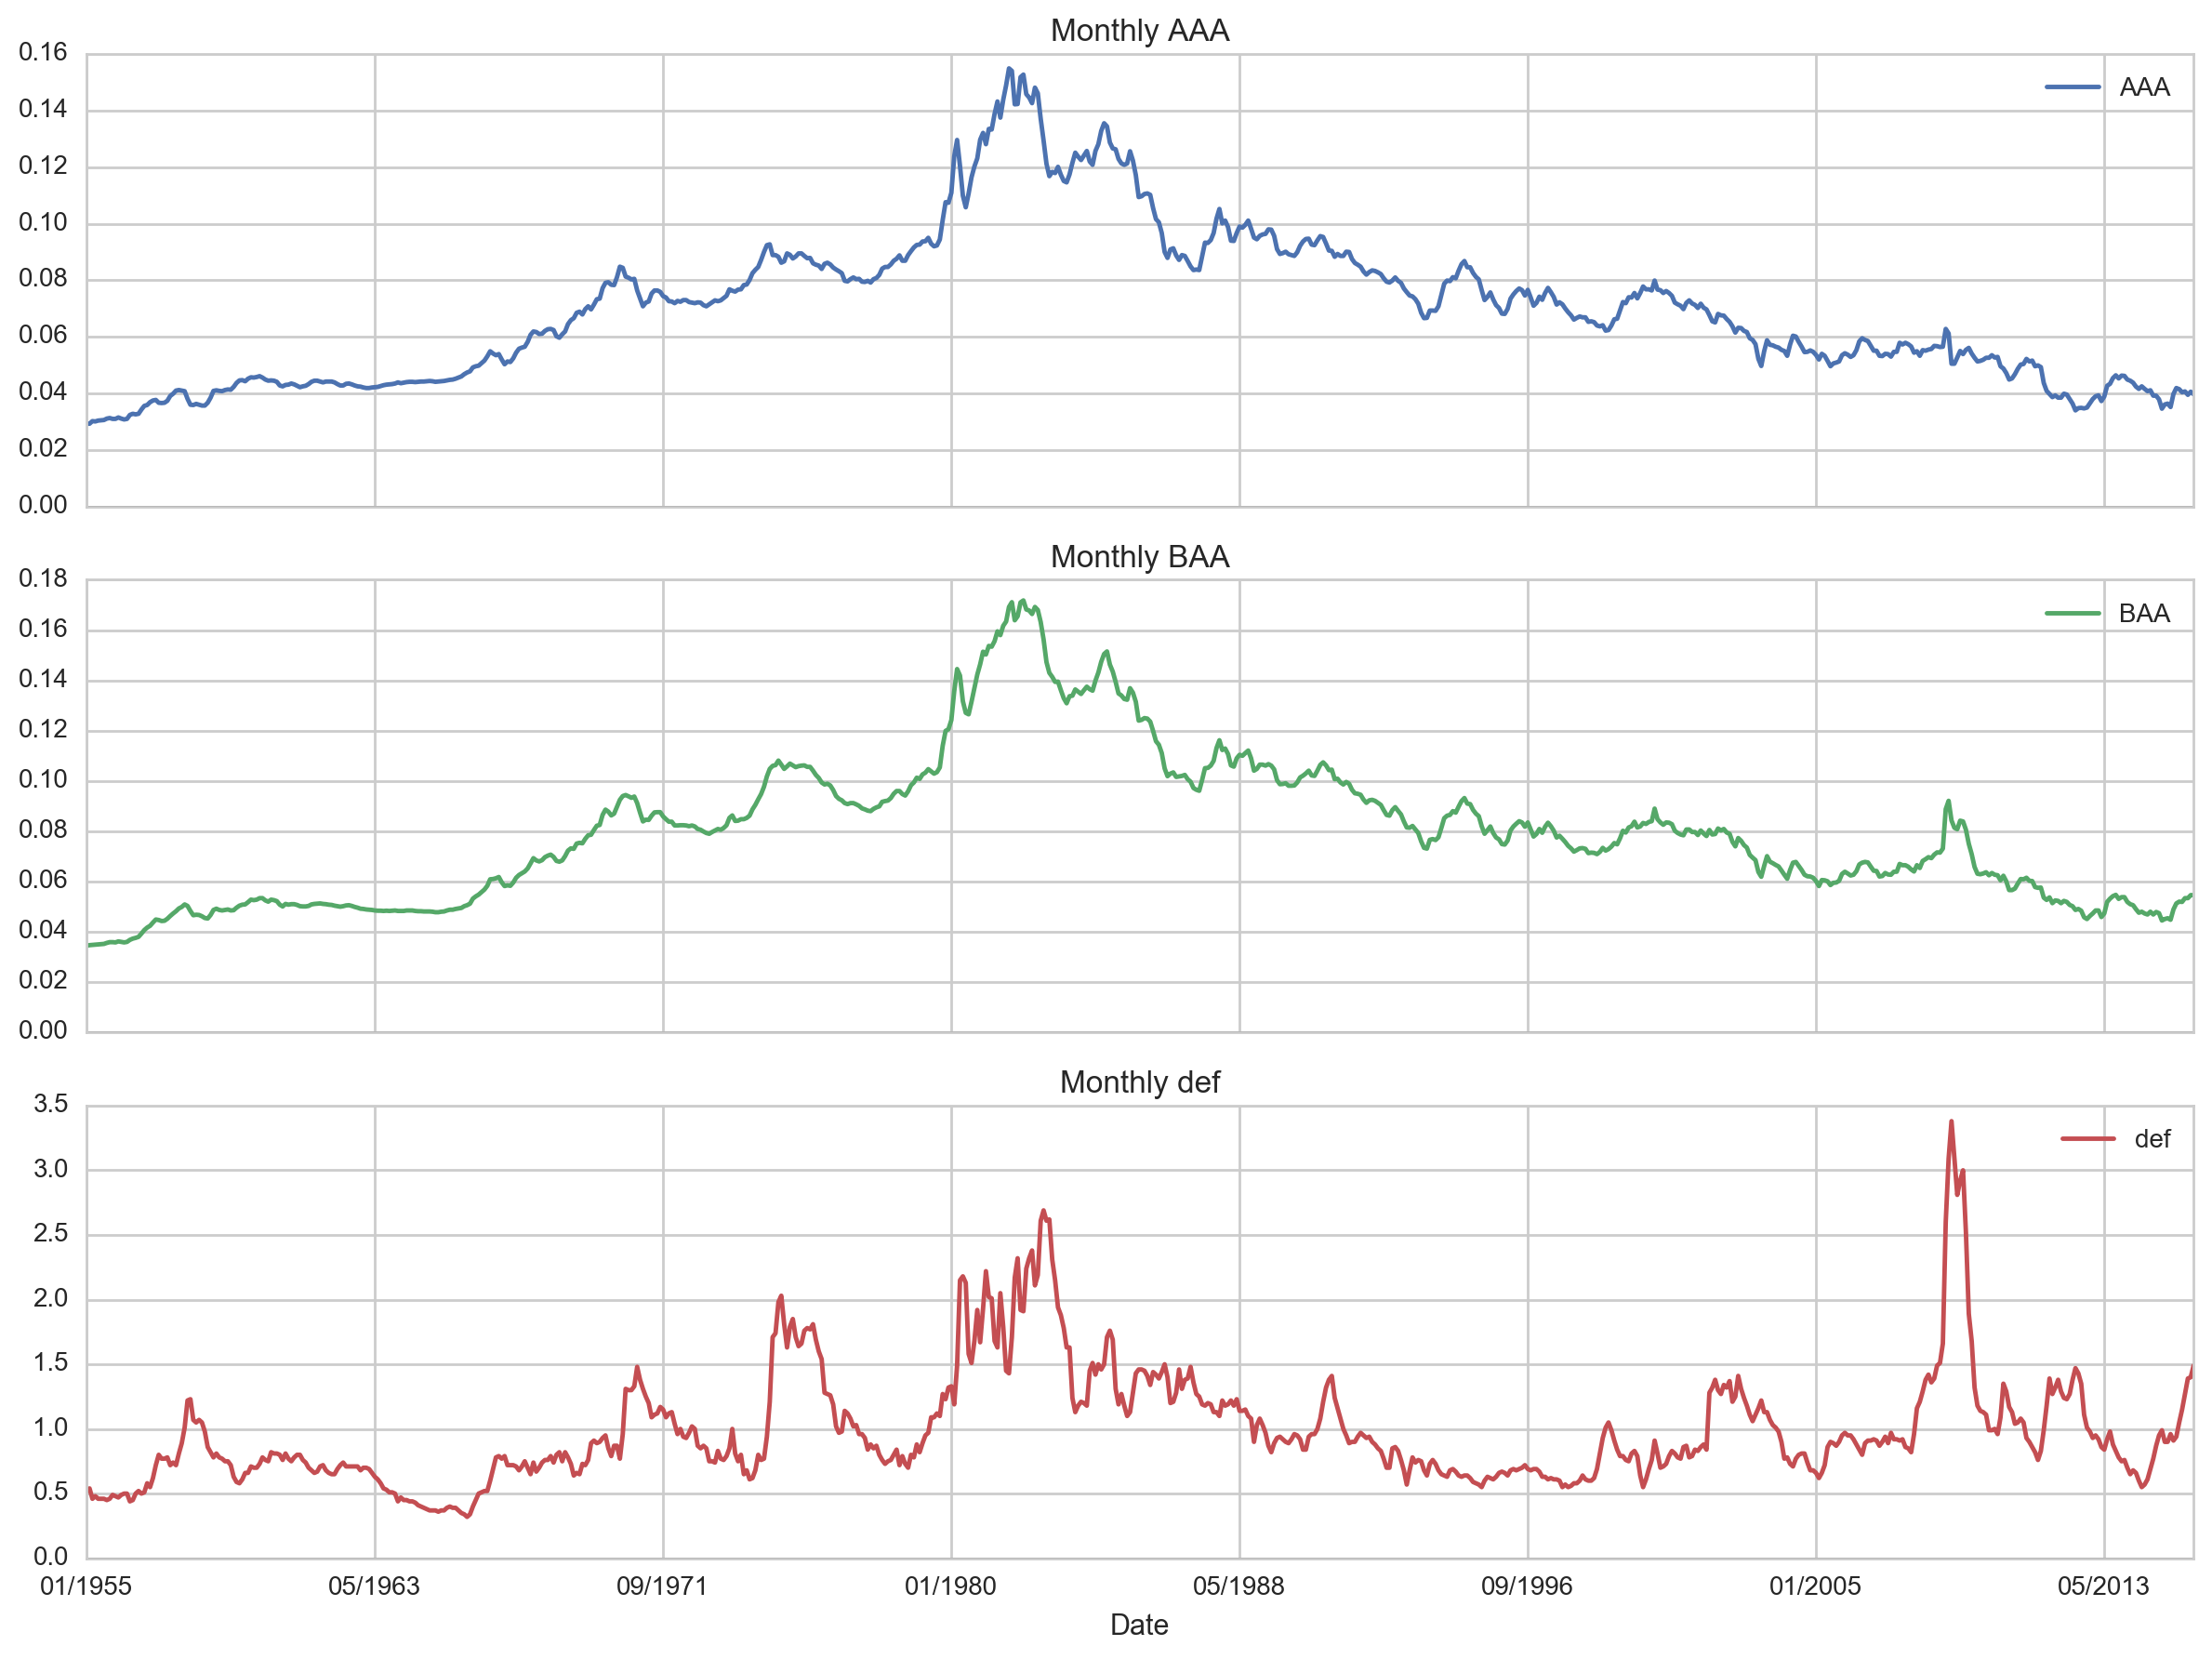

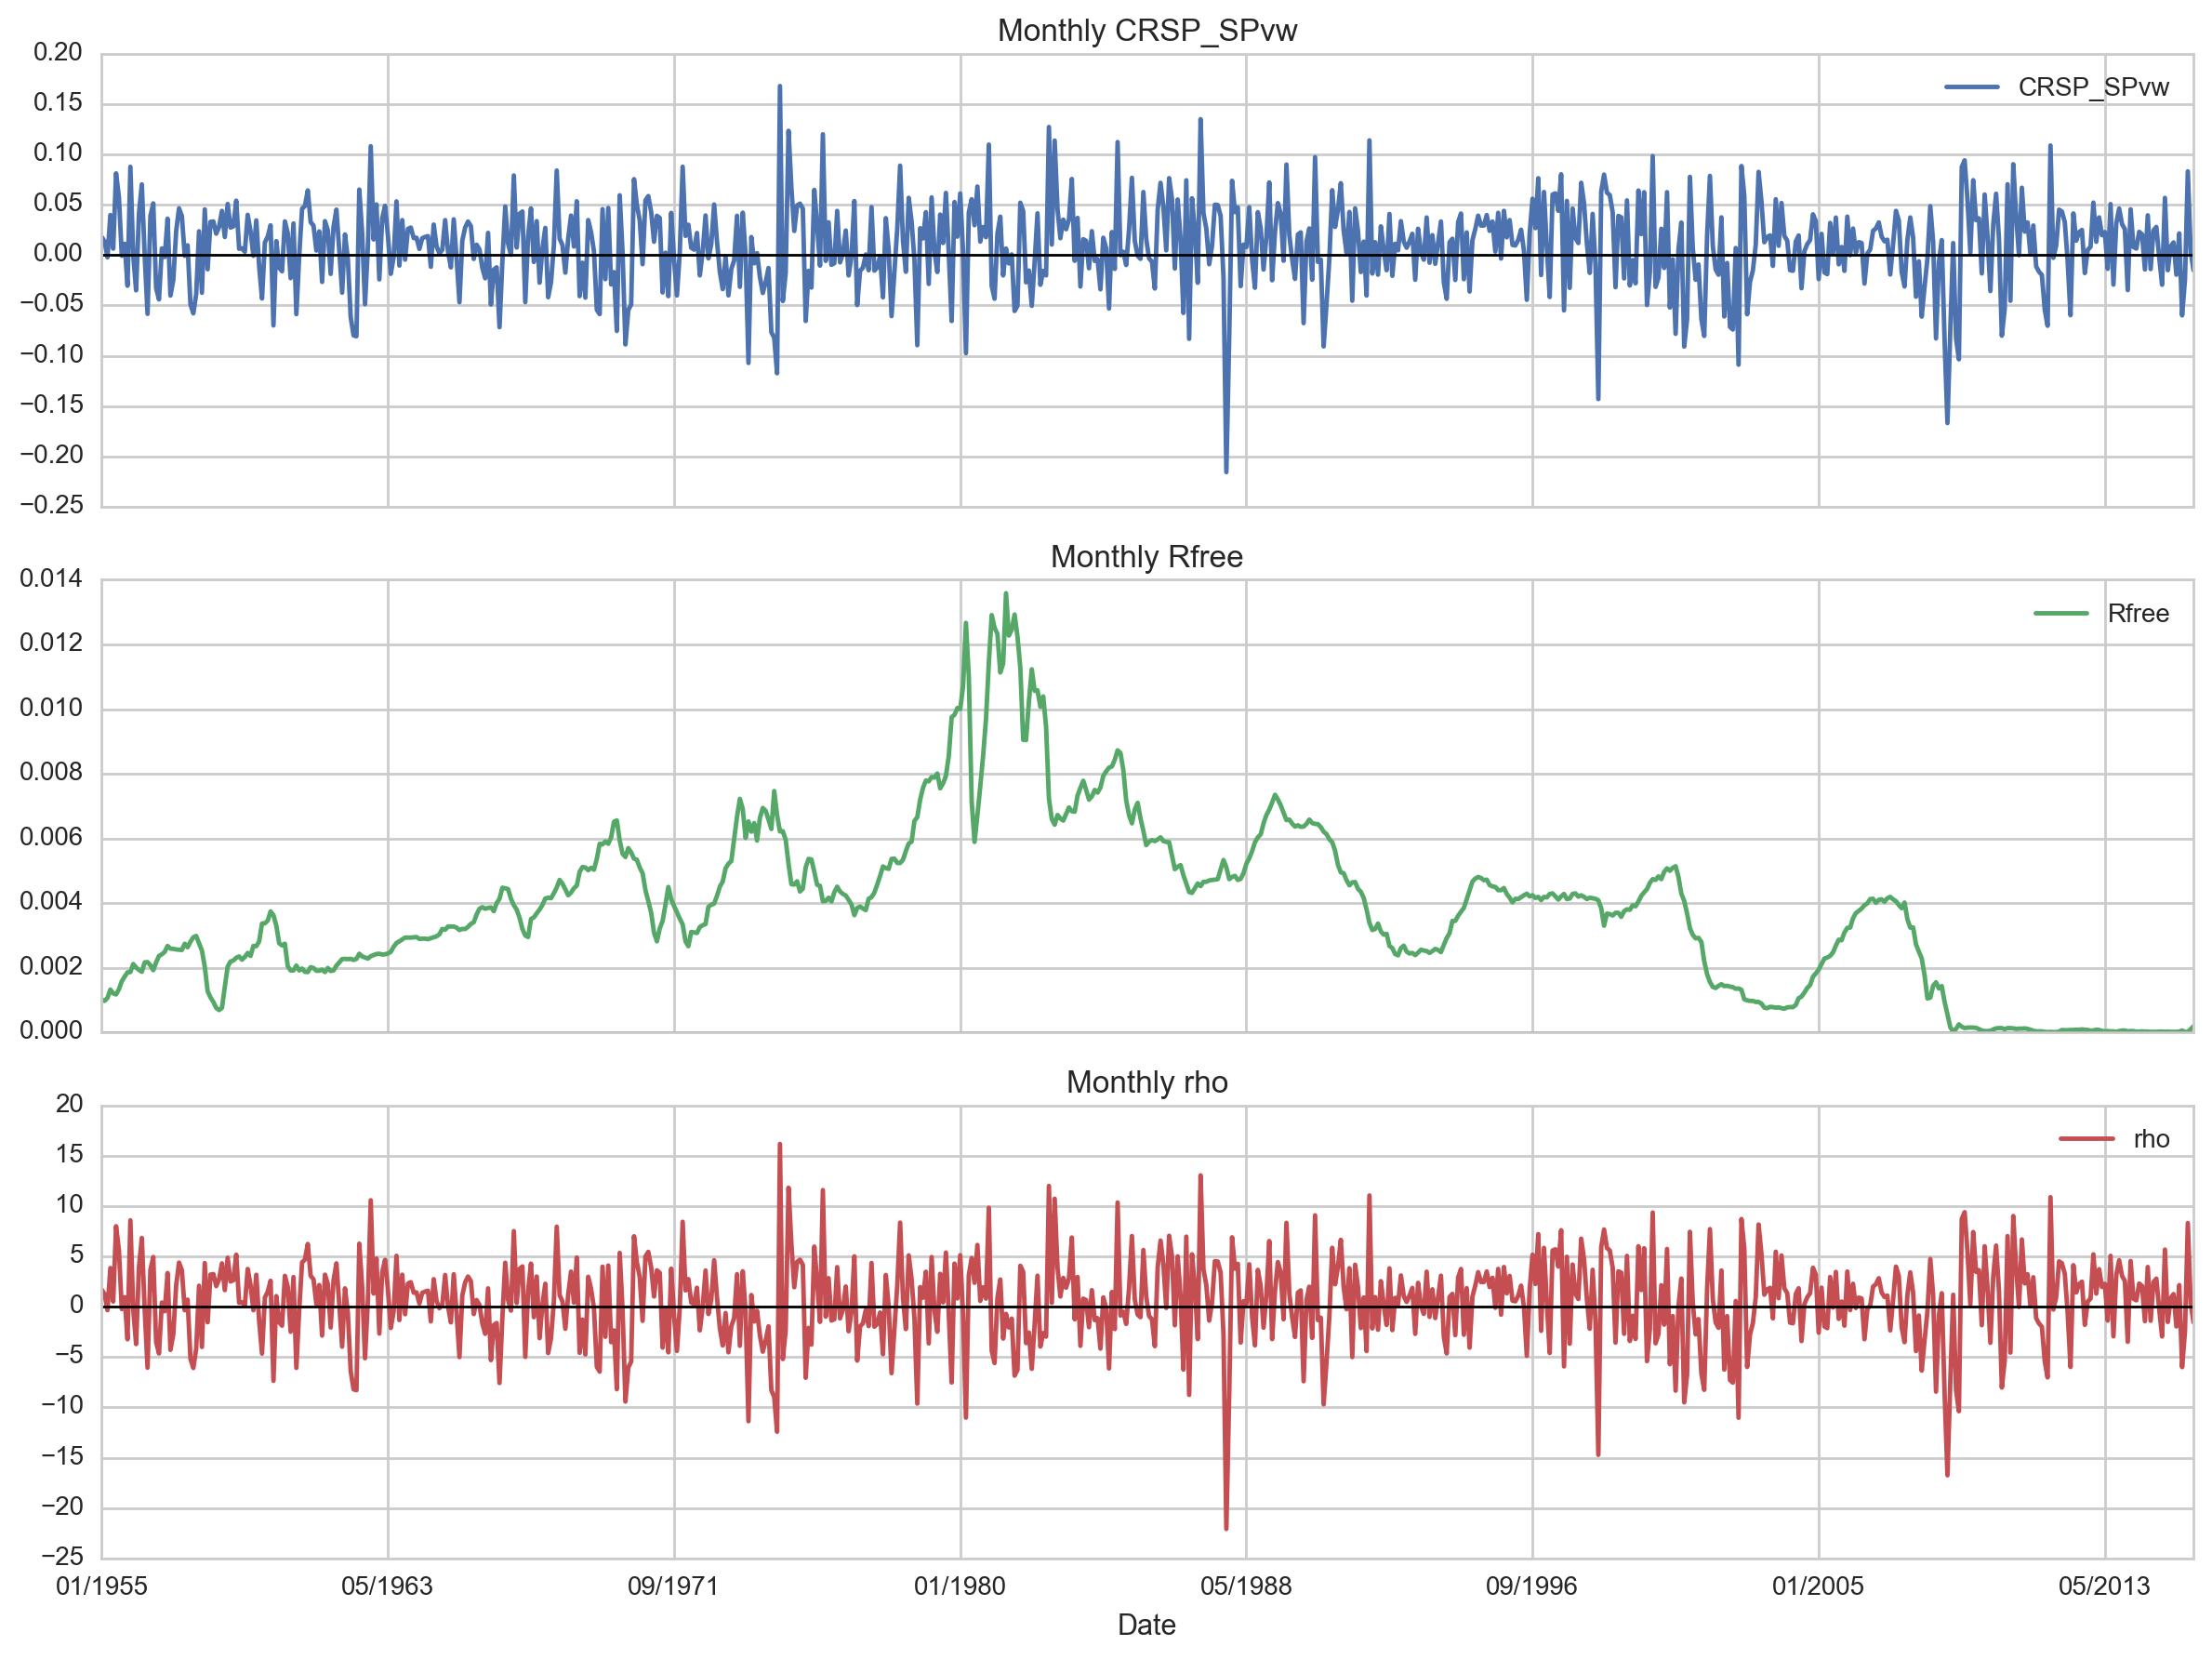

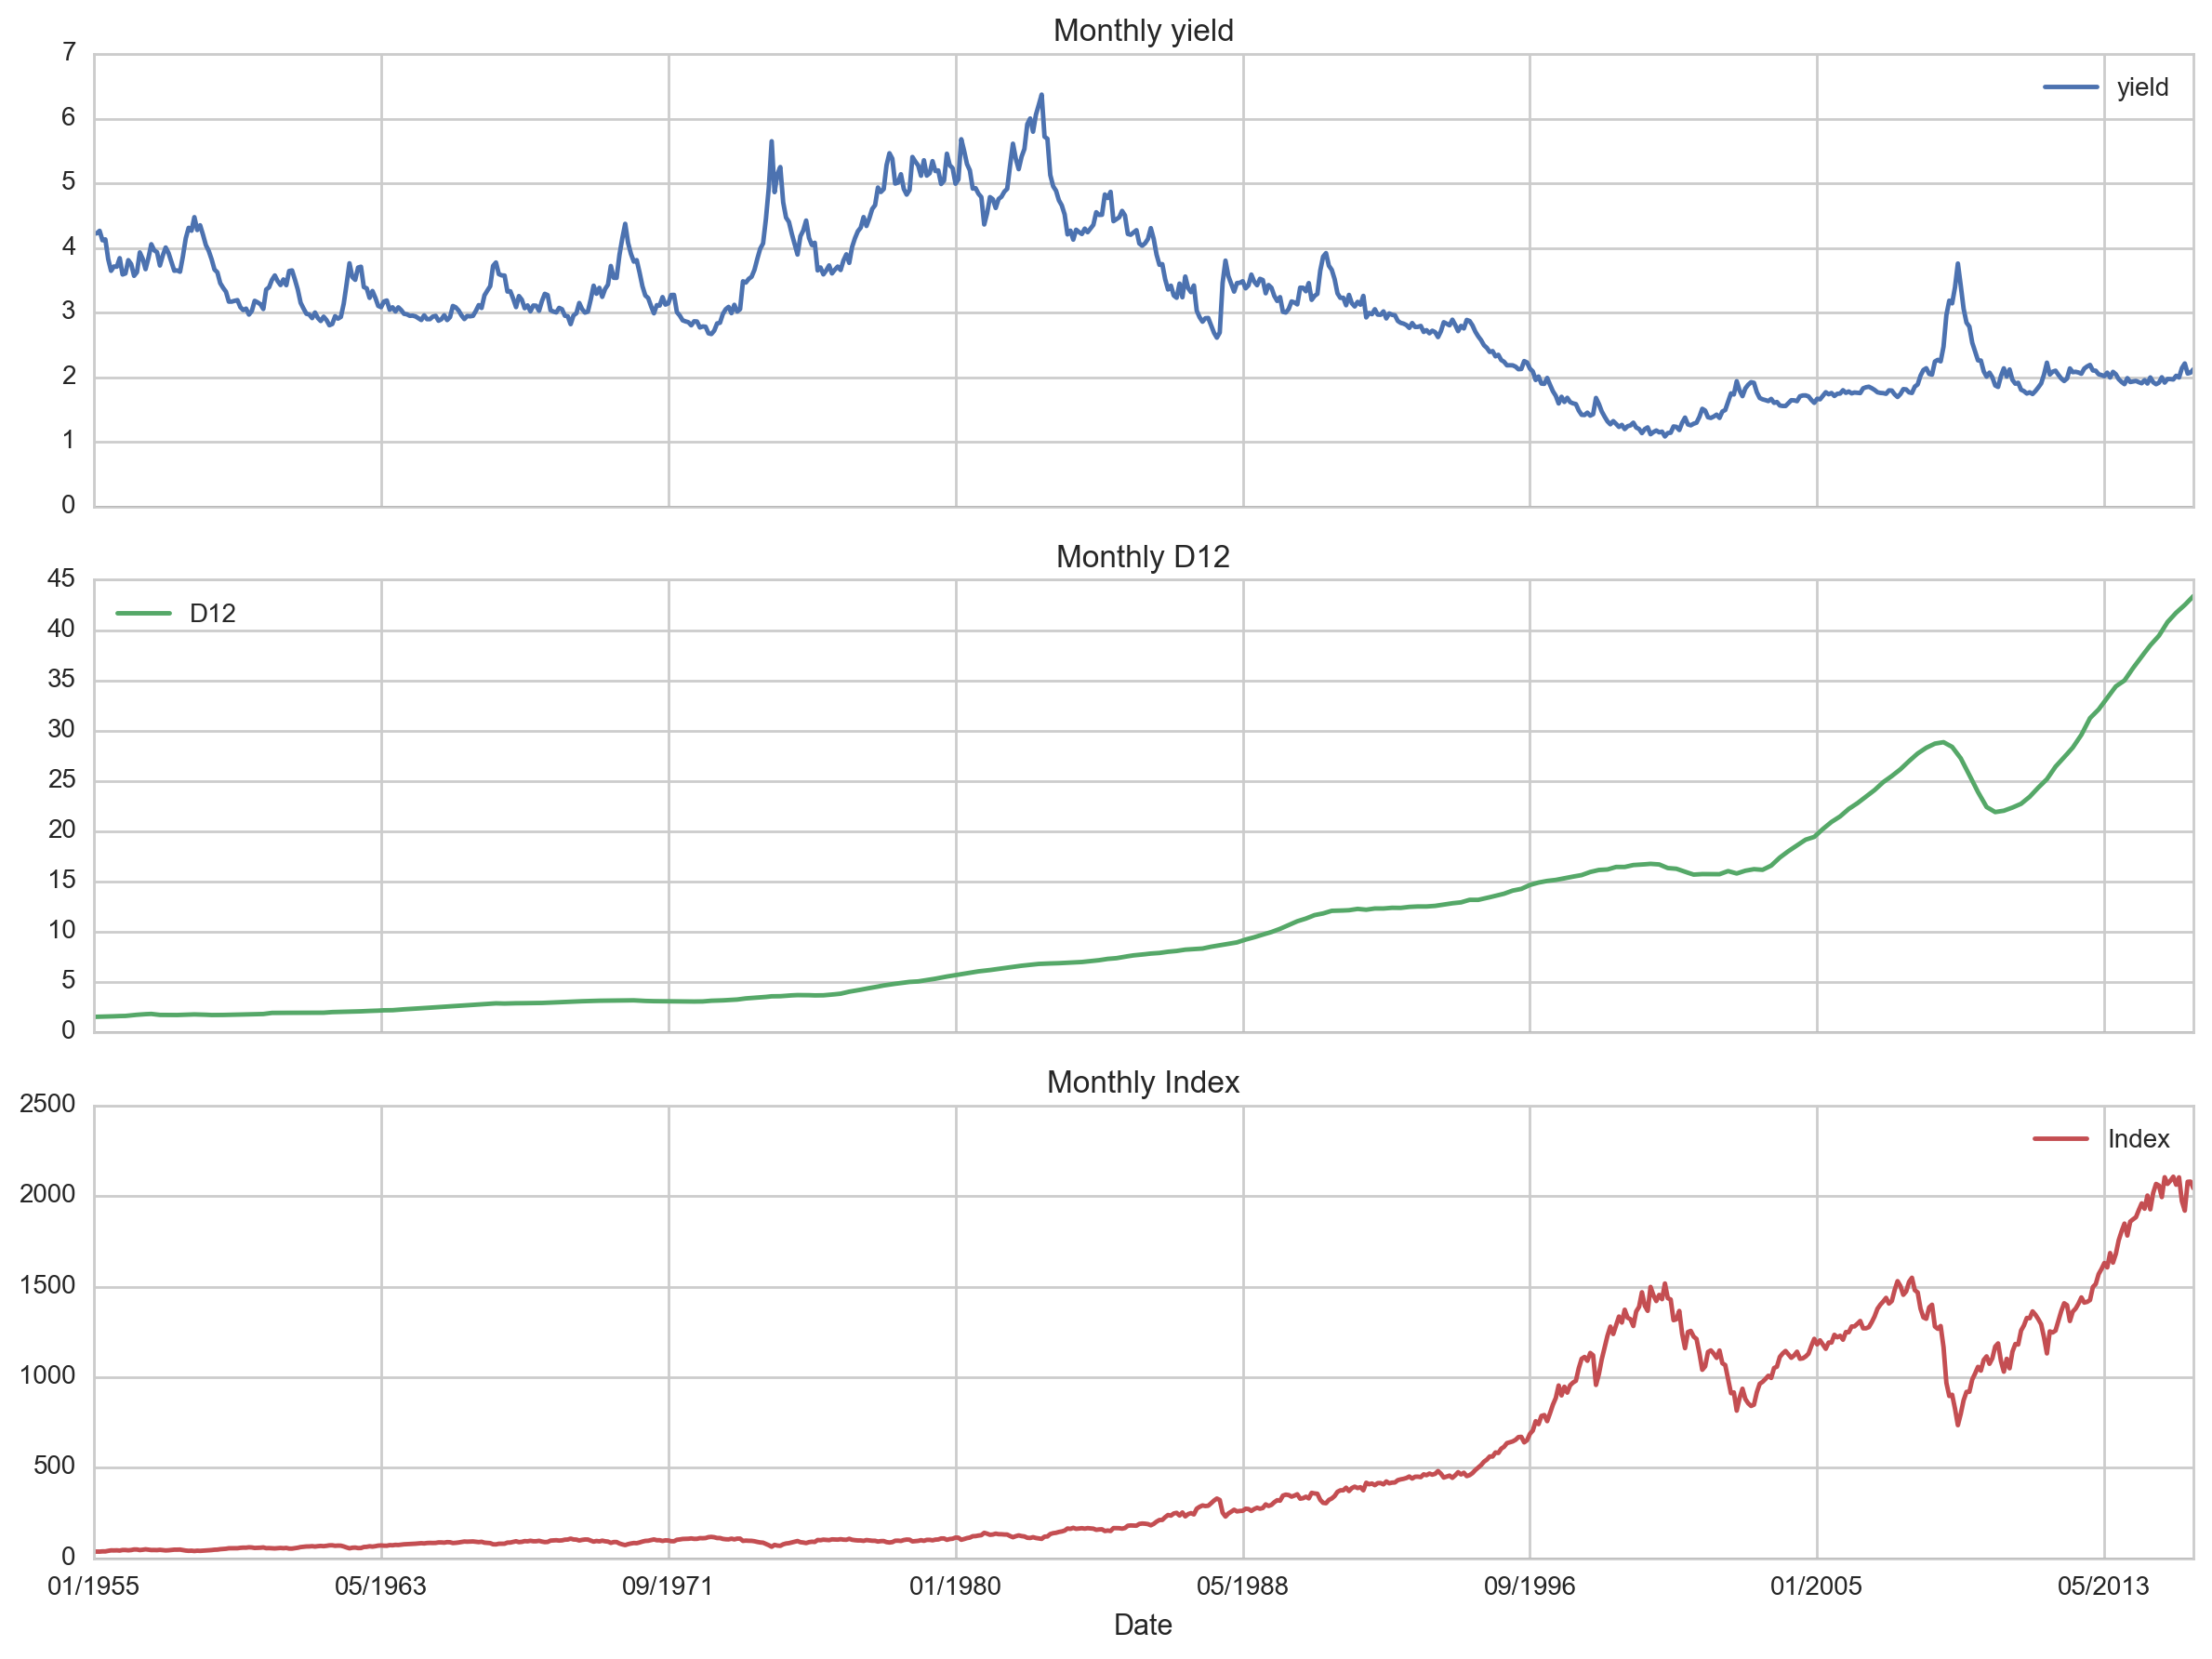

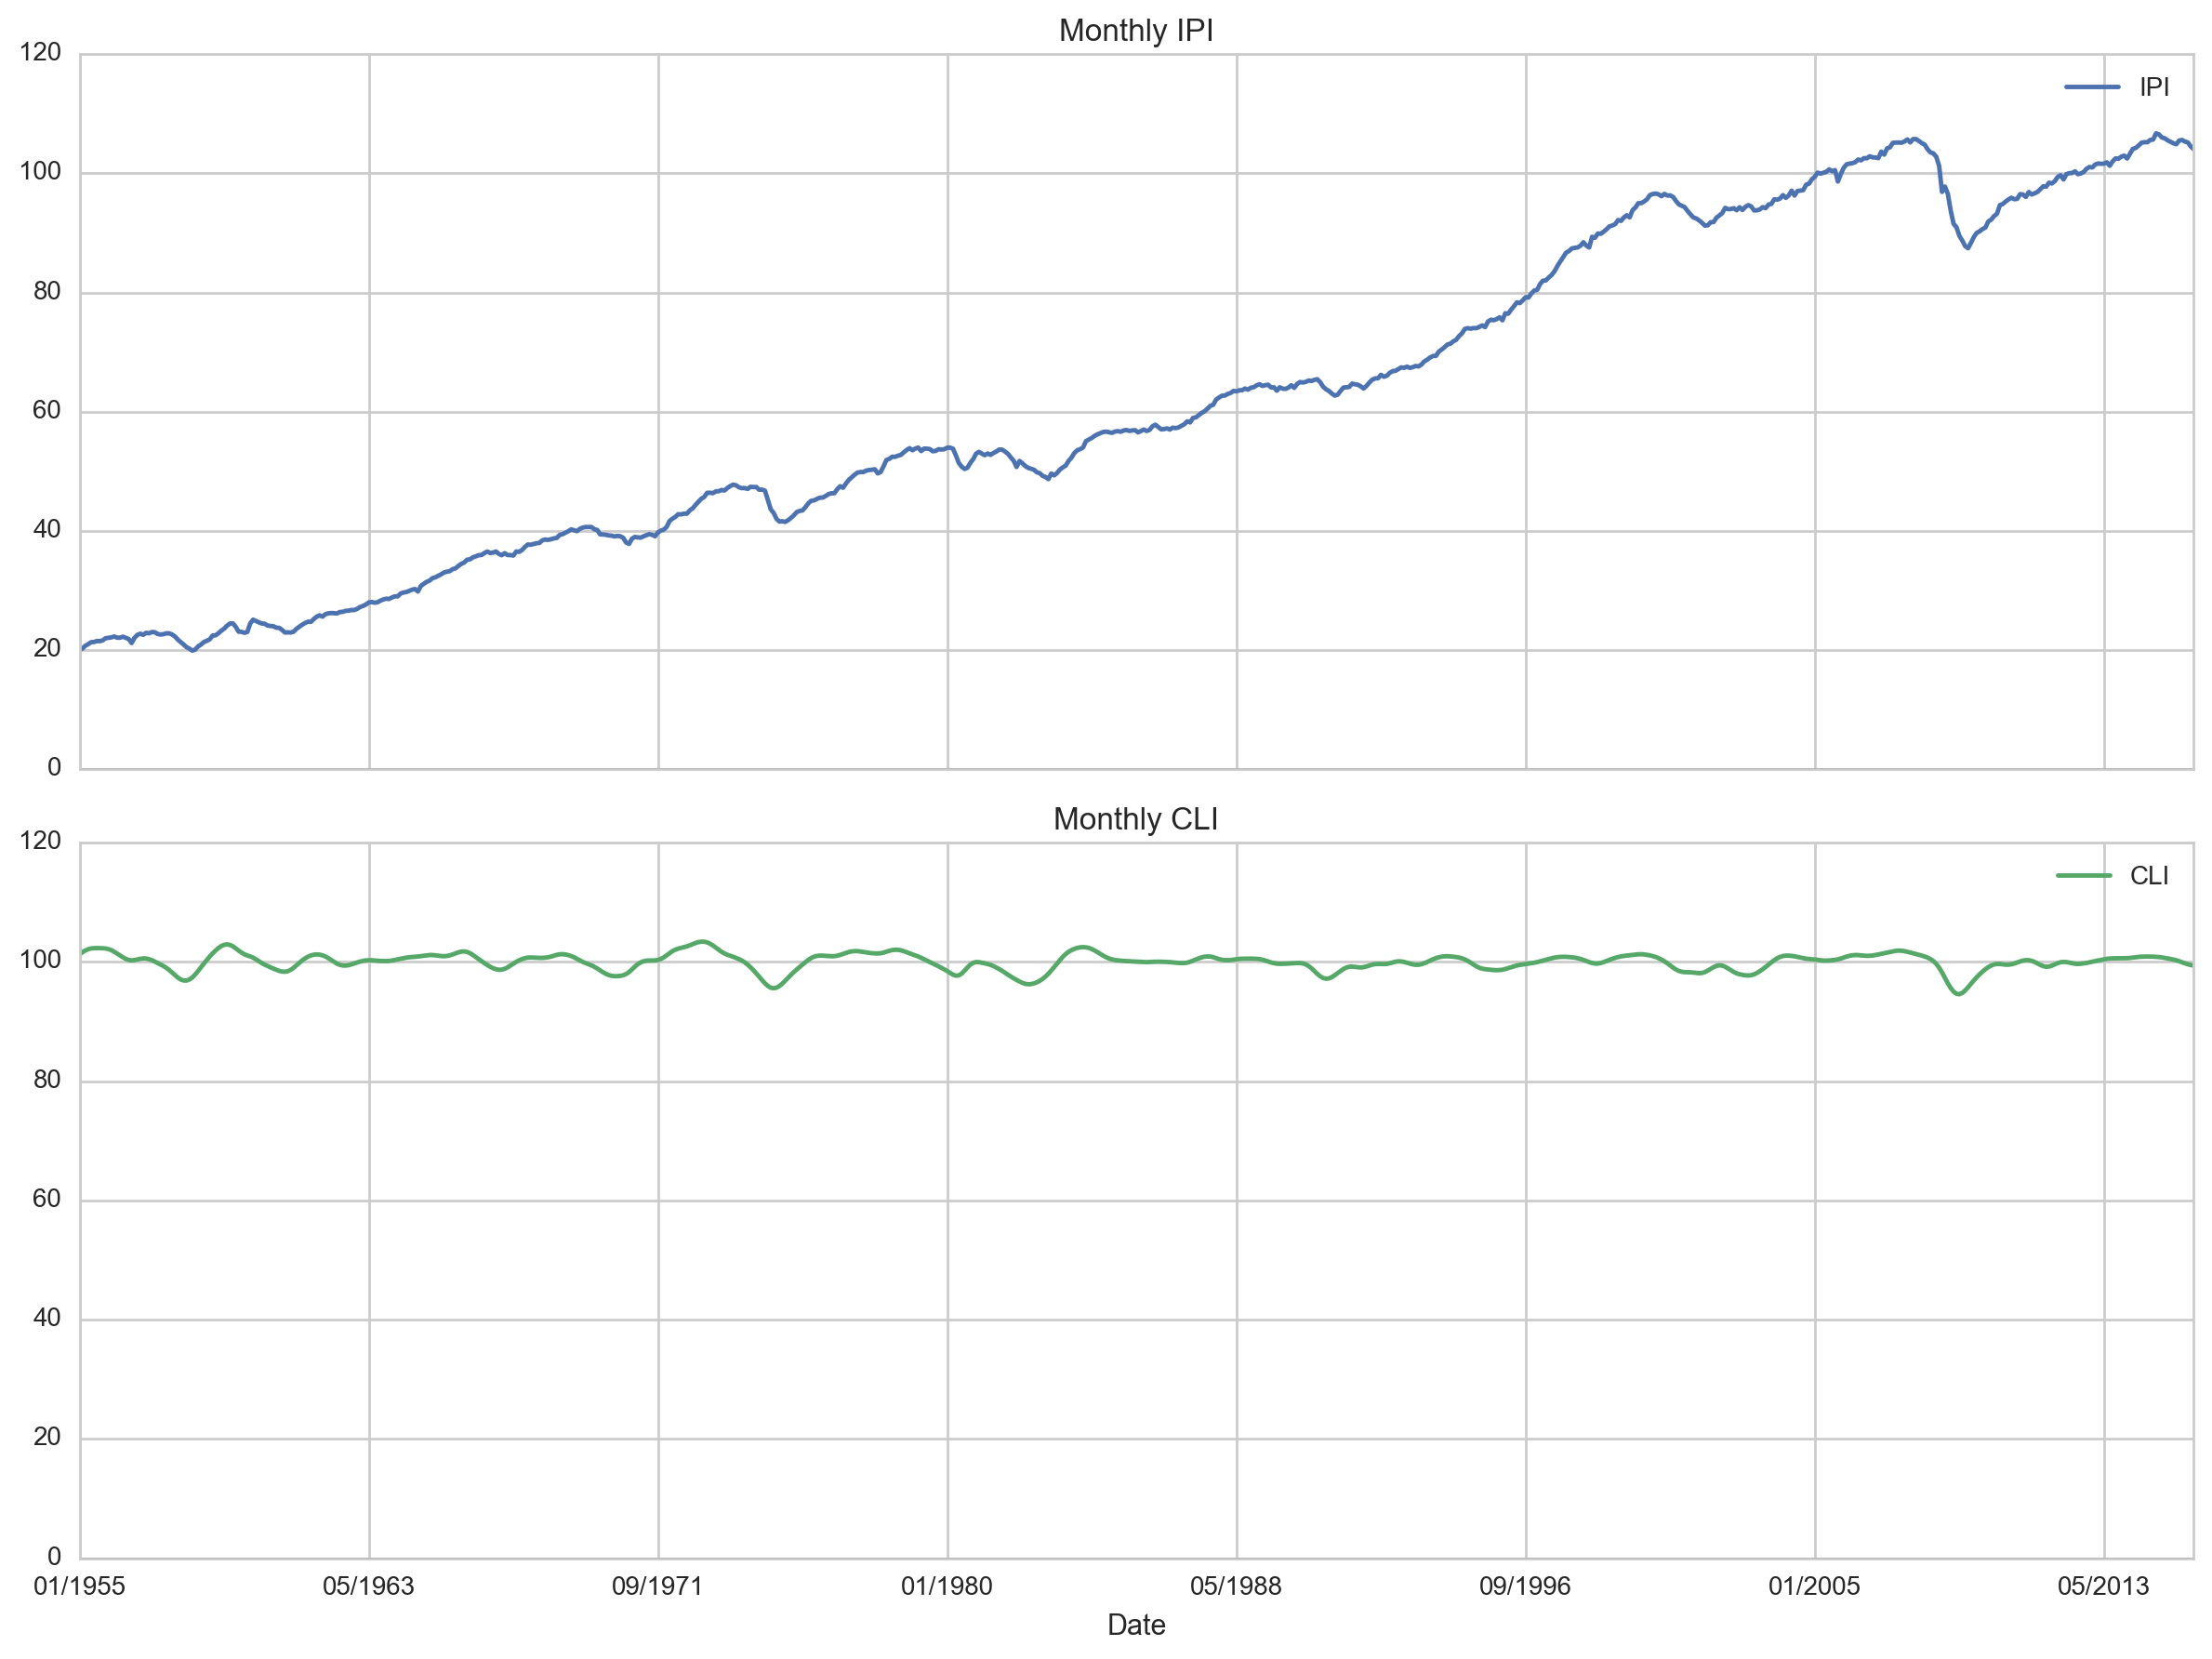

In [14]:
my_plot(df, plot_col1)
my_plot(df, plot_col2)
my_plot(df, plot_col3)
my_plot(df, plot_col4)

In [15]:
#Isolate data during hyperinflation in the late '80s
volcker = df['01/1975':'12/1985']
volcker.describe()

,Index,D12,AAA,BAA,Rfree,CRSP_SPvw,IPI,CLI,rho,i,def,yield
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,123.993561,5.759697,0.108781,0.123445,0.007194,0.013524,51.246819,99.890108,0.632956,8.632878,1.466364,4.687218
std,32.050018,1.367925,0.022258,0.025395,0.002500,0.042219,4.124473,1.795088,4.269927,3.000480,0.486565,0.613653
min,76.980000,3.623330,0.079200,0.088000,0.003625,-0.097518,41.525200,95.588920,-11.018467,4.350000,0.700000,3.590542
25%,99.792500,4.542503,0.087425,0.100450,0.005196,-0.013272,49.585325,98.709140,-1.959175,6.235000,1.097500,4.234798
50%,111.920000,5.961665,0.110050,0.124550,0.006833,0.011273,52.073700,100.126600,0.412350,8.200000,1.445000,4.659894
75%,150.577500,6.912500,0.125625,0.142000,0.008462,0.041761,53.753725,101.431650,3.194500,10.155000,1.782500,5.130949
max,211.280000,7.900000,0.154900,0.171800,0.013583,0.127402,57.563600,102.488500,12.016867,16.299999,2.690000,6.371584


In [19]:
#Variance during 80s Recession
volcker.var()

Index        1027.203637
D12             1.871219
AAA             0.000495
BAA             0.000645
Rfree           0.000006
CRSP_SPvw       0.001782
IPI            17.011278
CLI             3.222341
rho            18.232272
i               9.002883
def             0.236745
yield           0.376570
dtype: float64

In [20]:
#Correlation Matrix during 80s Recession 
volcker.corr()

,Index,D12,AAA,BAA,Rfree,CRSP_SPvw,IPI,CLI,rho,i,def,yield
Index,1.000000,0.873353,0.527911,0.491578,0.215939,0.092103,0.677195,0.164689,0.078422,0.215939,0.150648,-0.267191
D12,0.873353,1.000000,0.780869,0.740791,0.526558,0.010253,0.802570,-0.061654,-0.020697,0.526558,0.294153,0.228962
AAA,0.527911,0.780869,1.000000,0.987759,0.813056,-0.072104,0.496754,-0.399710,-0.118904,0.813056,0.580688,0.430583
BAA,0.491578,0.740791,0.987759,1.000000,0.780665,-0.022709,0.397731,-0.494789,-0.068168,0.780665,0.700573,0.415856
Rfree,0.215939,0.526558,0.813056,0.780665,1.000000,-0.163576,0.506498,-0.328674,-0.220294,1.000000,0.355022,0.580206
CRSP_SPvw,0.092103,0.010253,-0.072104,-0.022709,-0.163576,1.000000,-0.091175,-0.168558,0.998330,-0.163576,0.211327,-0.166316
IPI,0.677195,0.802570,0.496754,0.397731,0.506498,-0.091175,1.000000,0.296578,-0.119809,0.506498,-0.196623,0.270092
CLI,0.164689,-0.061654,-0.399710,-0.494789,-0.328674,-0.168558,0.296578,1.000000,-0.147415,-0.328674,-0.753879,-0.419000
rho,0.078422,-0.020697,-0.118904,-0.068168,-0.220294,0.998330,-0.119809,-0.147415,1.000000,-0.220294,0.188160,-0.198421
i,0.215939,0.526558,0.813056,0.780665,1.000000,-0.163576,0.506498,-0.328674,-0.220294,1.000000,0.355022,0.580206


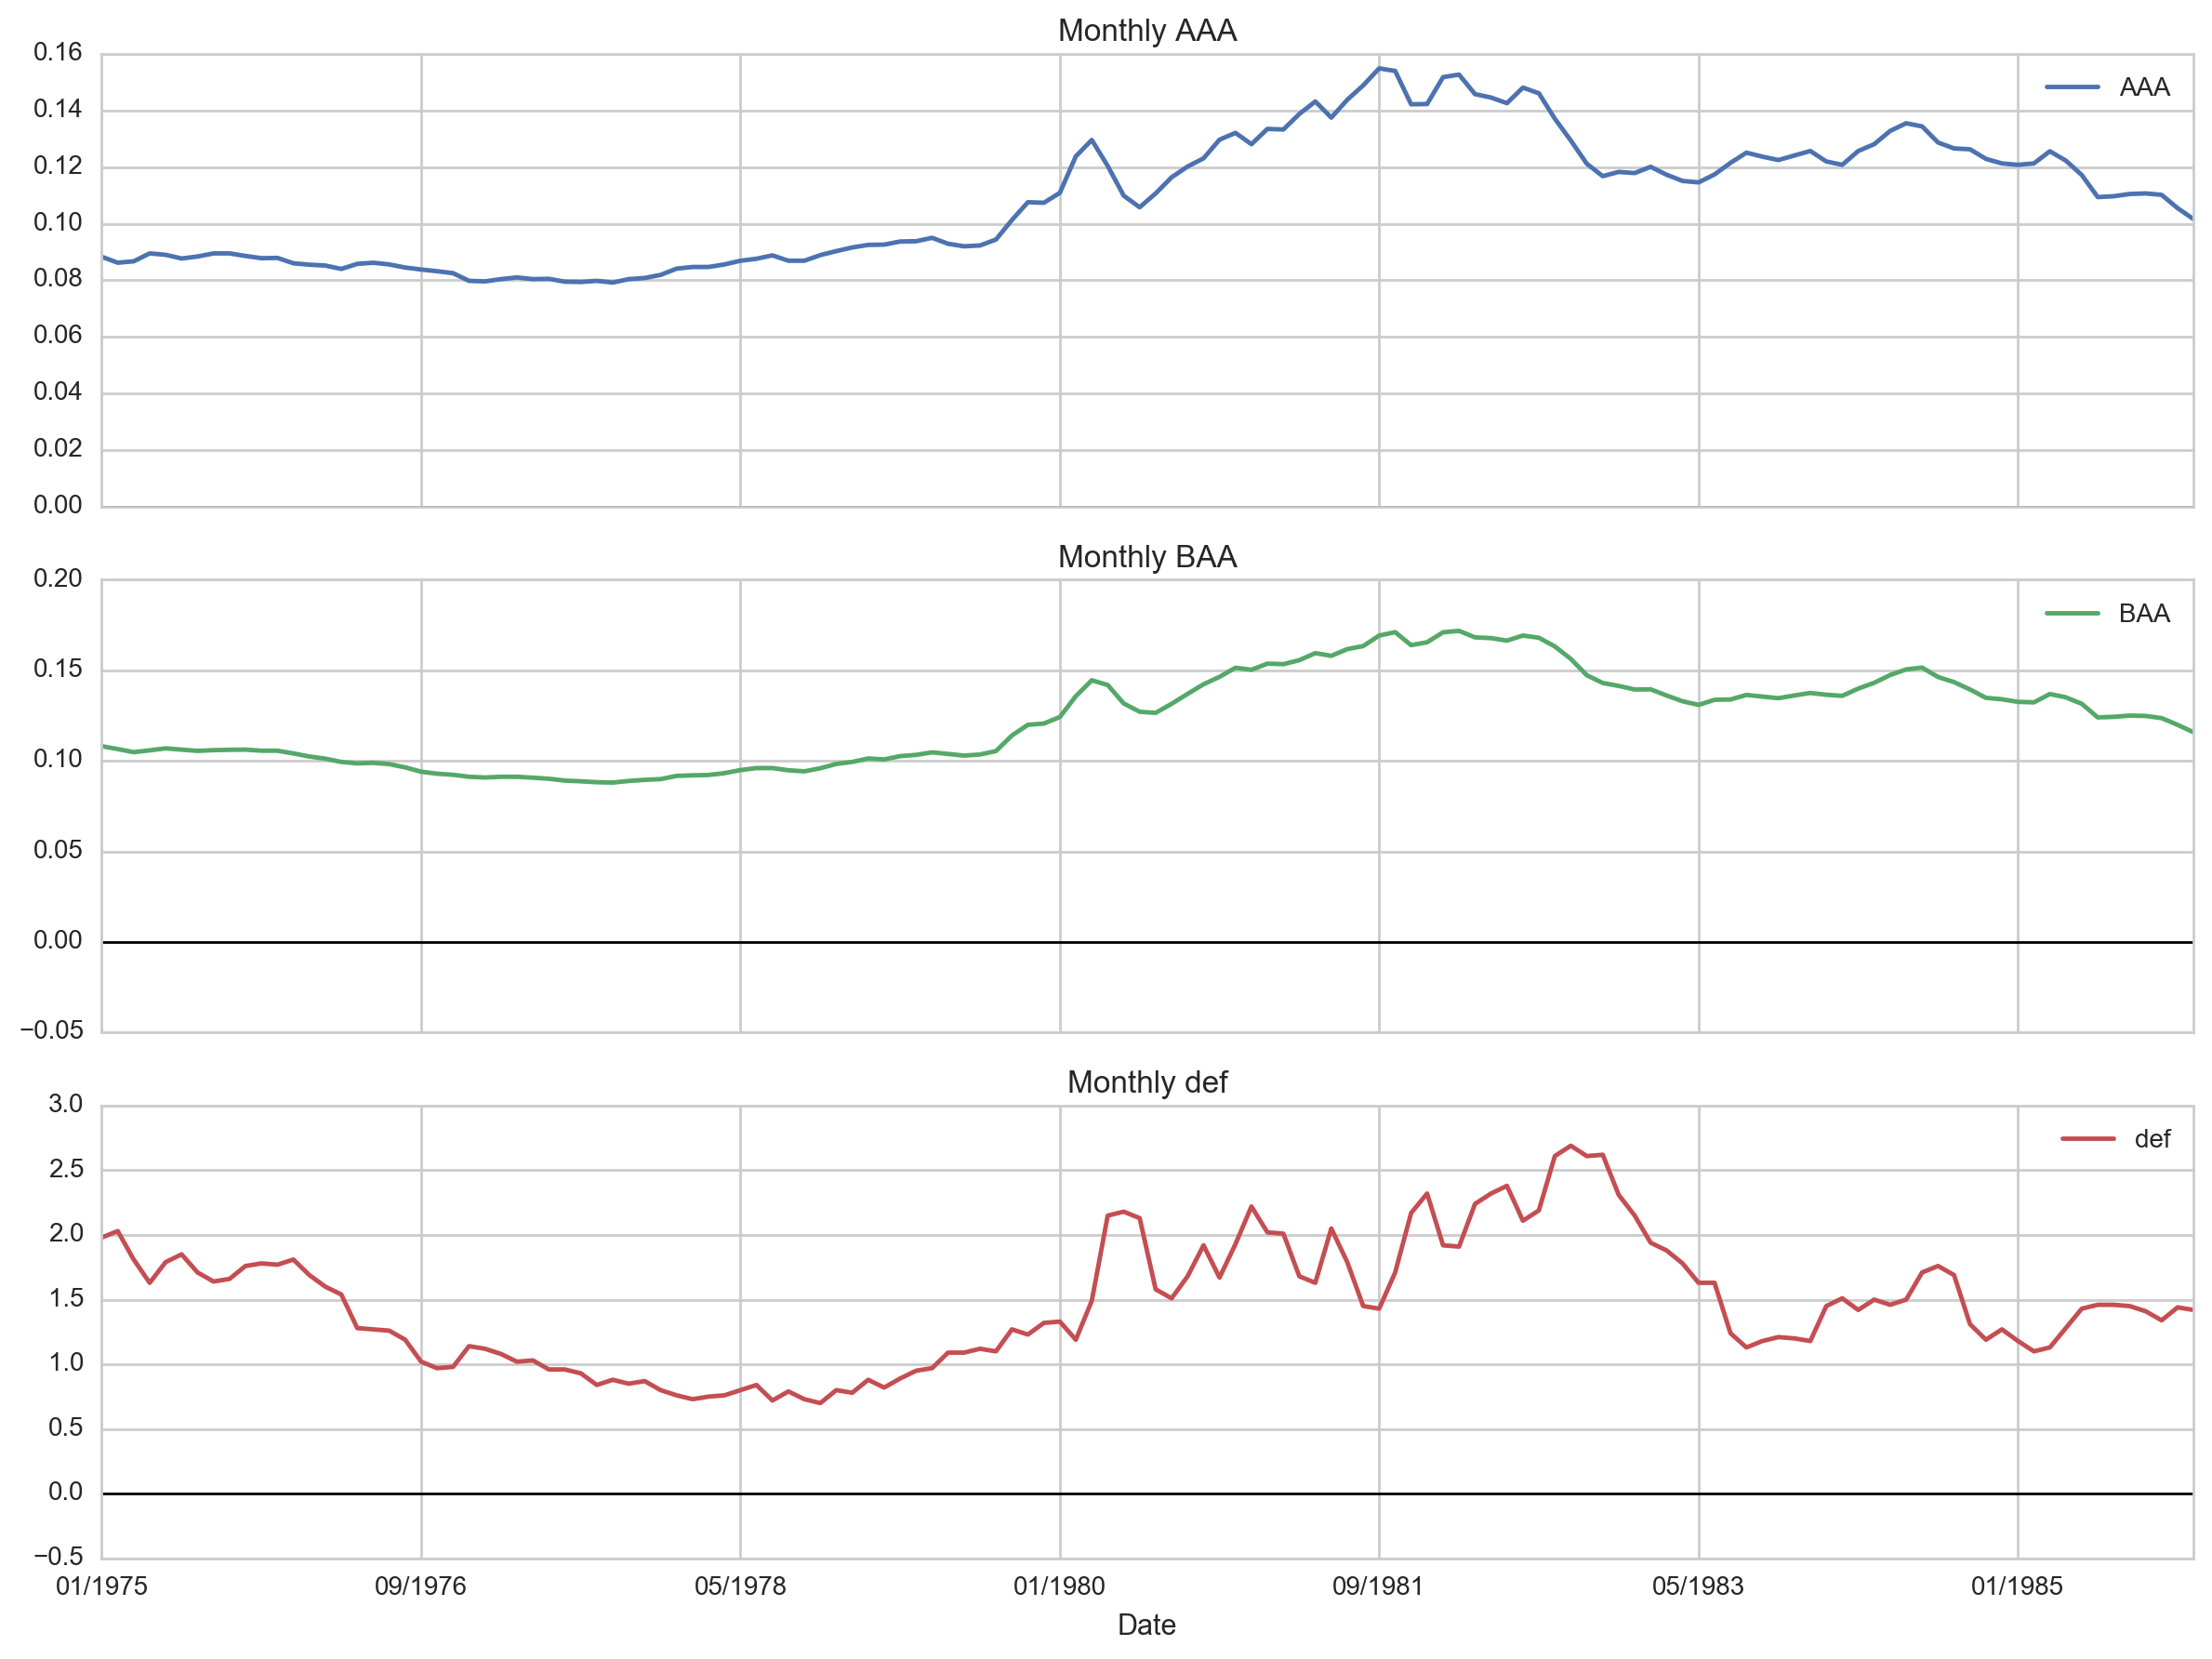

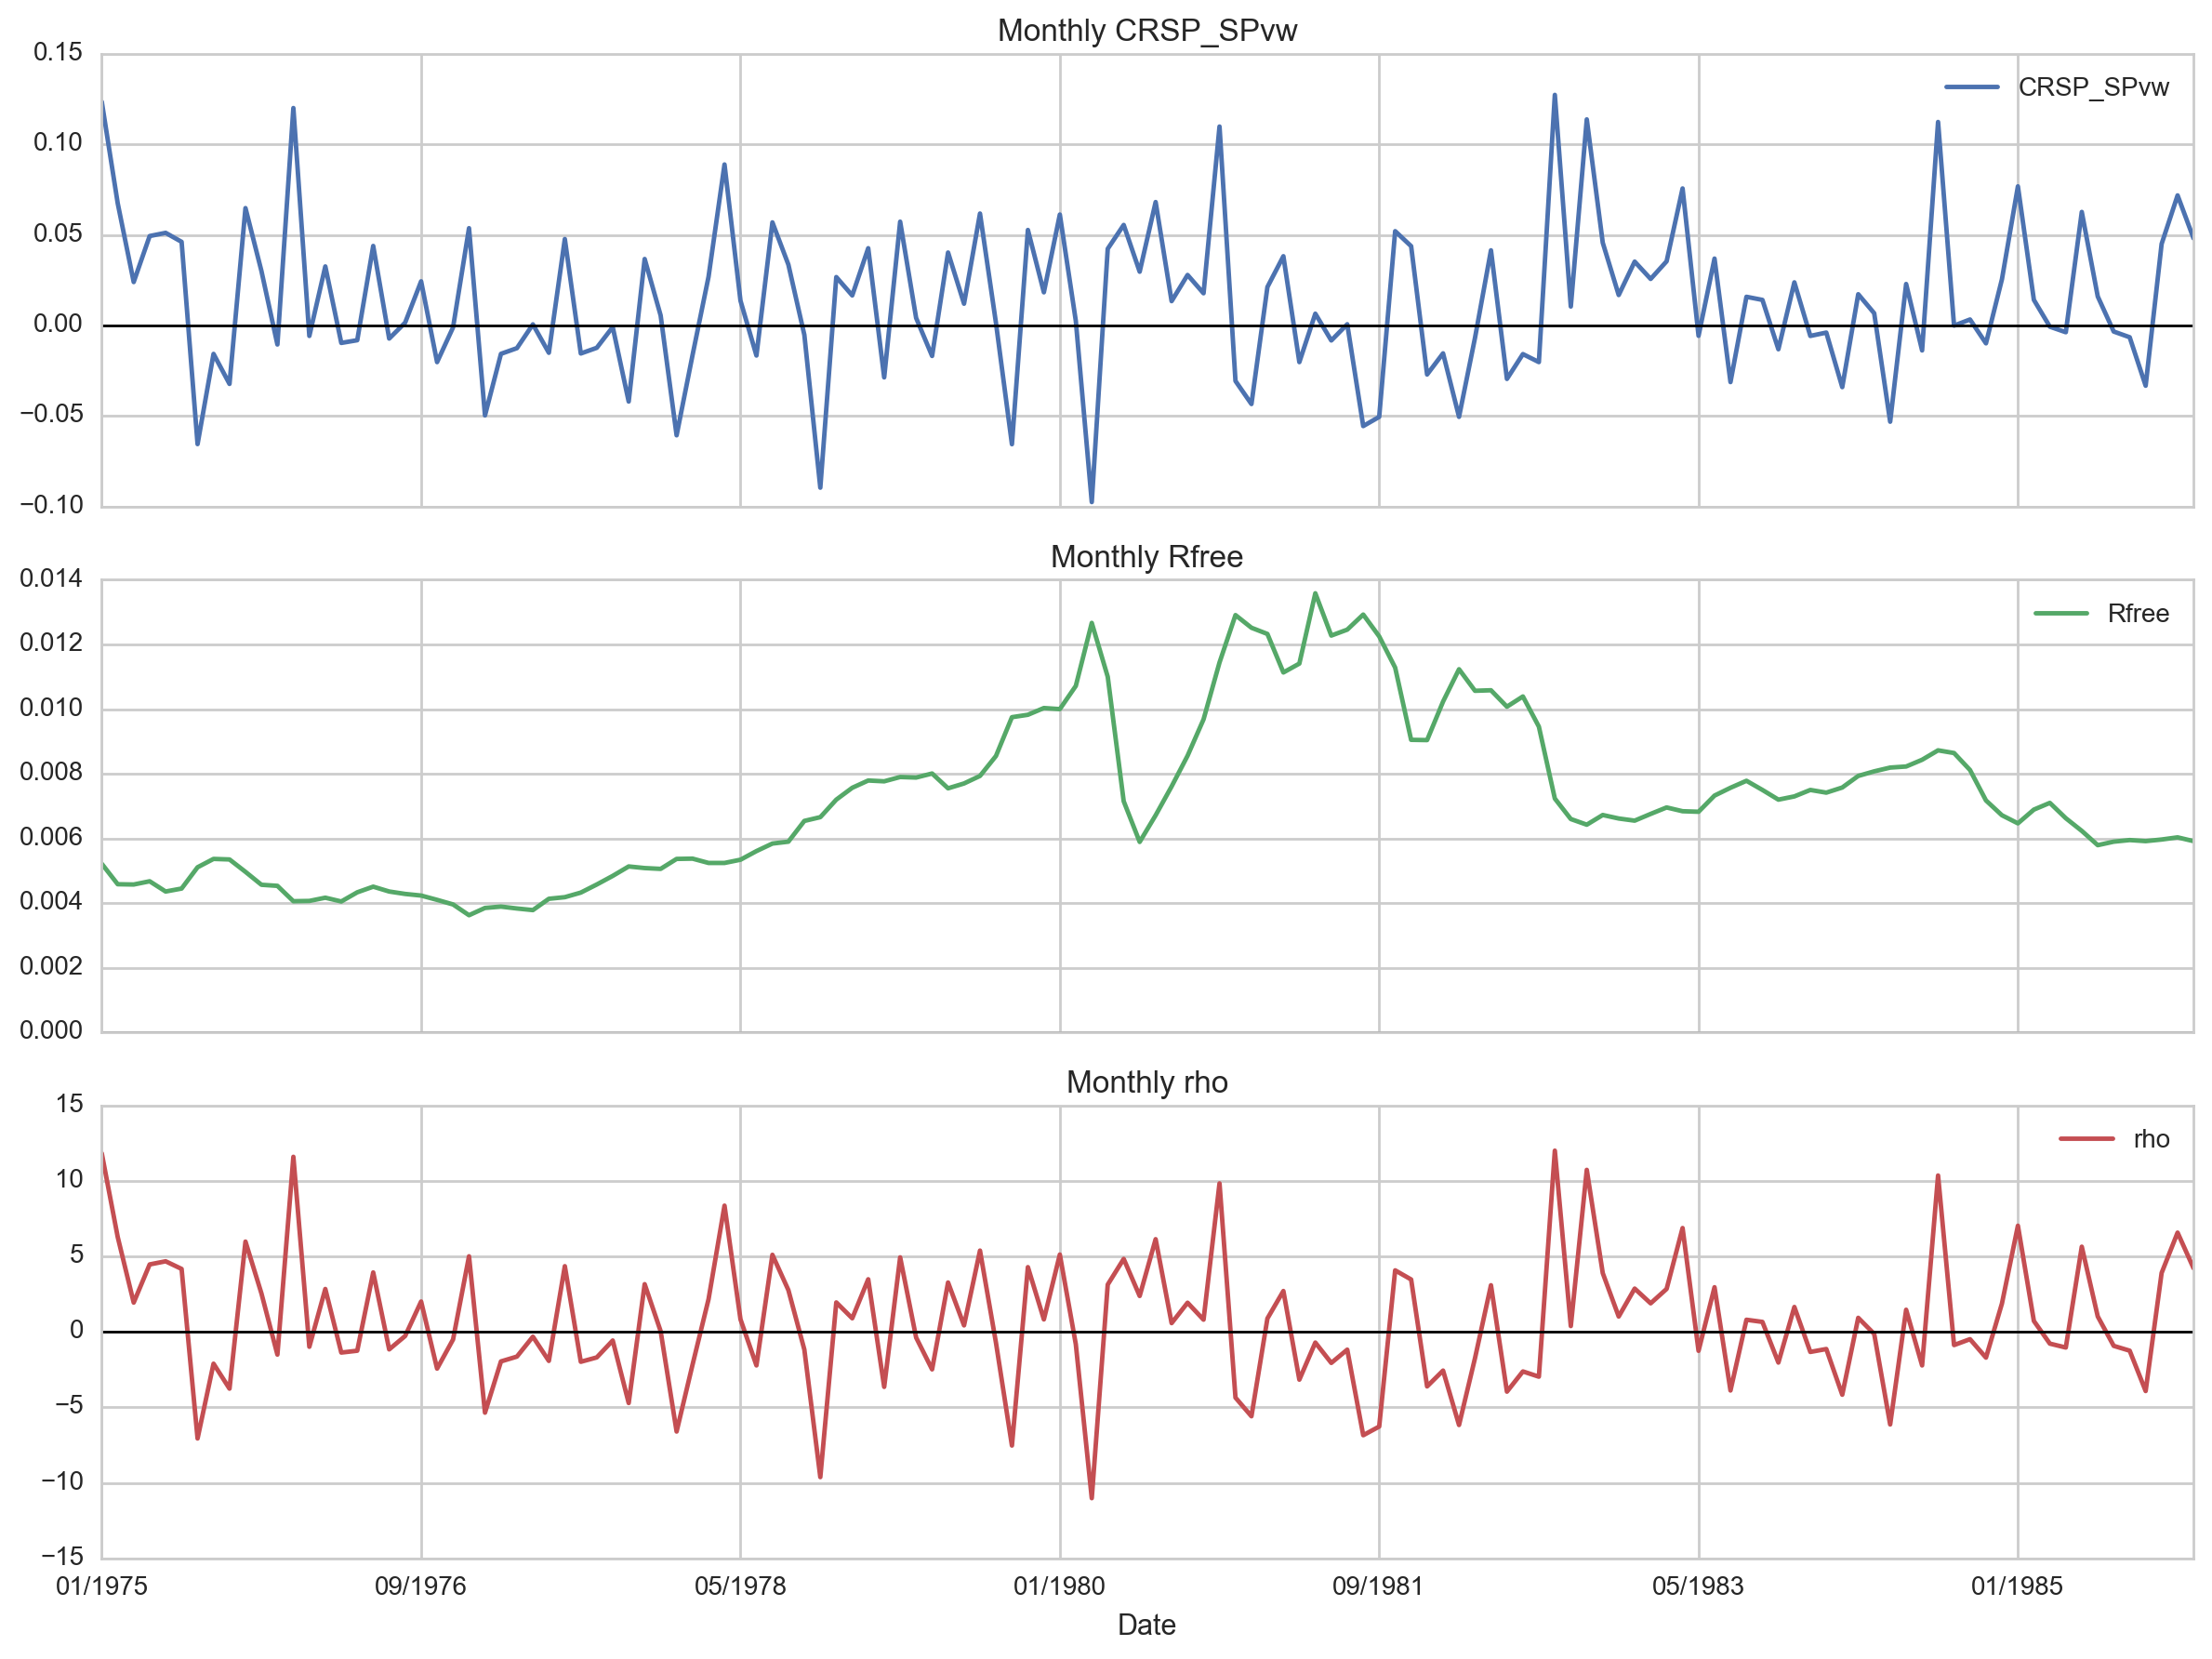

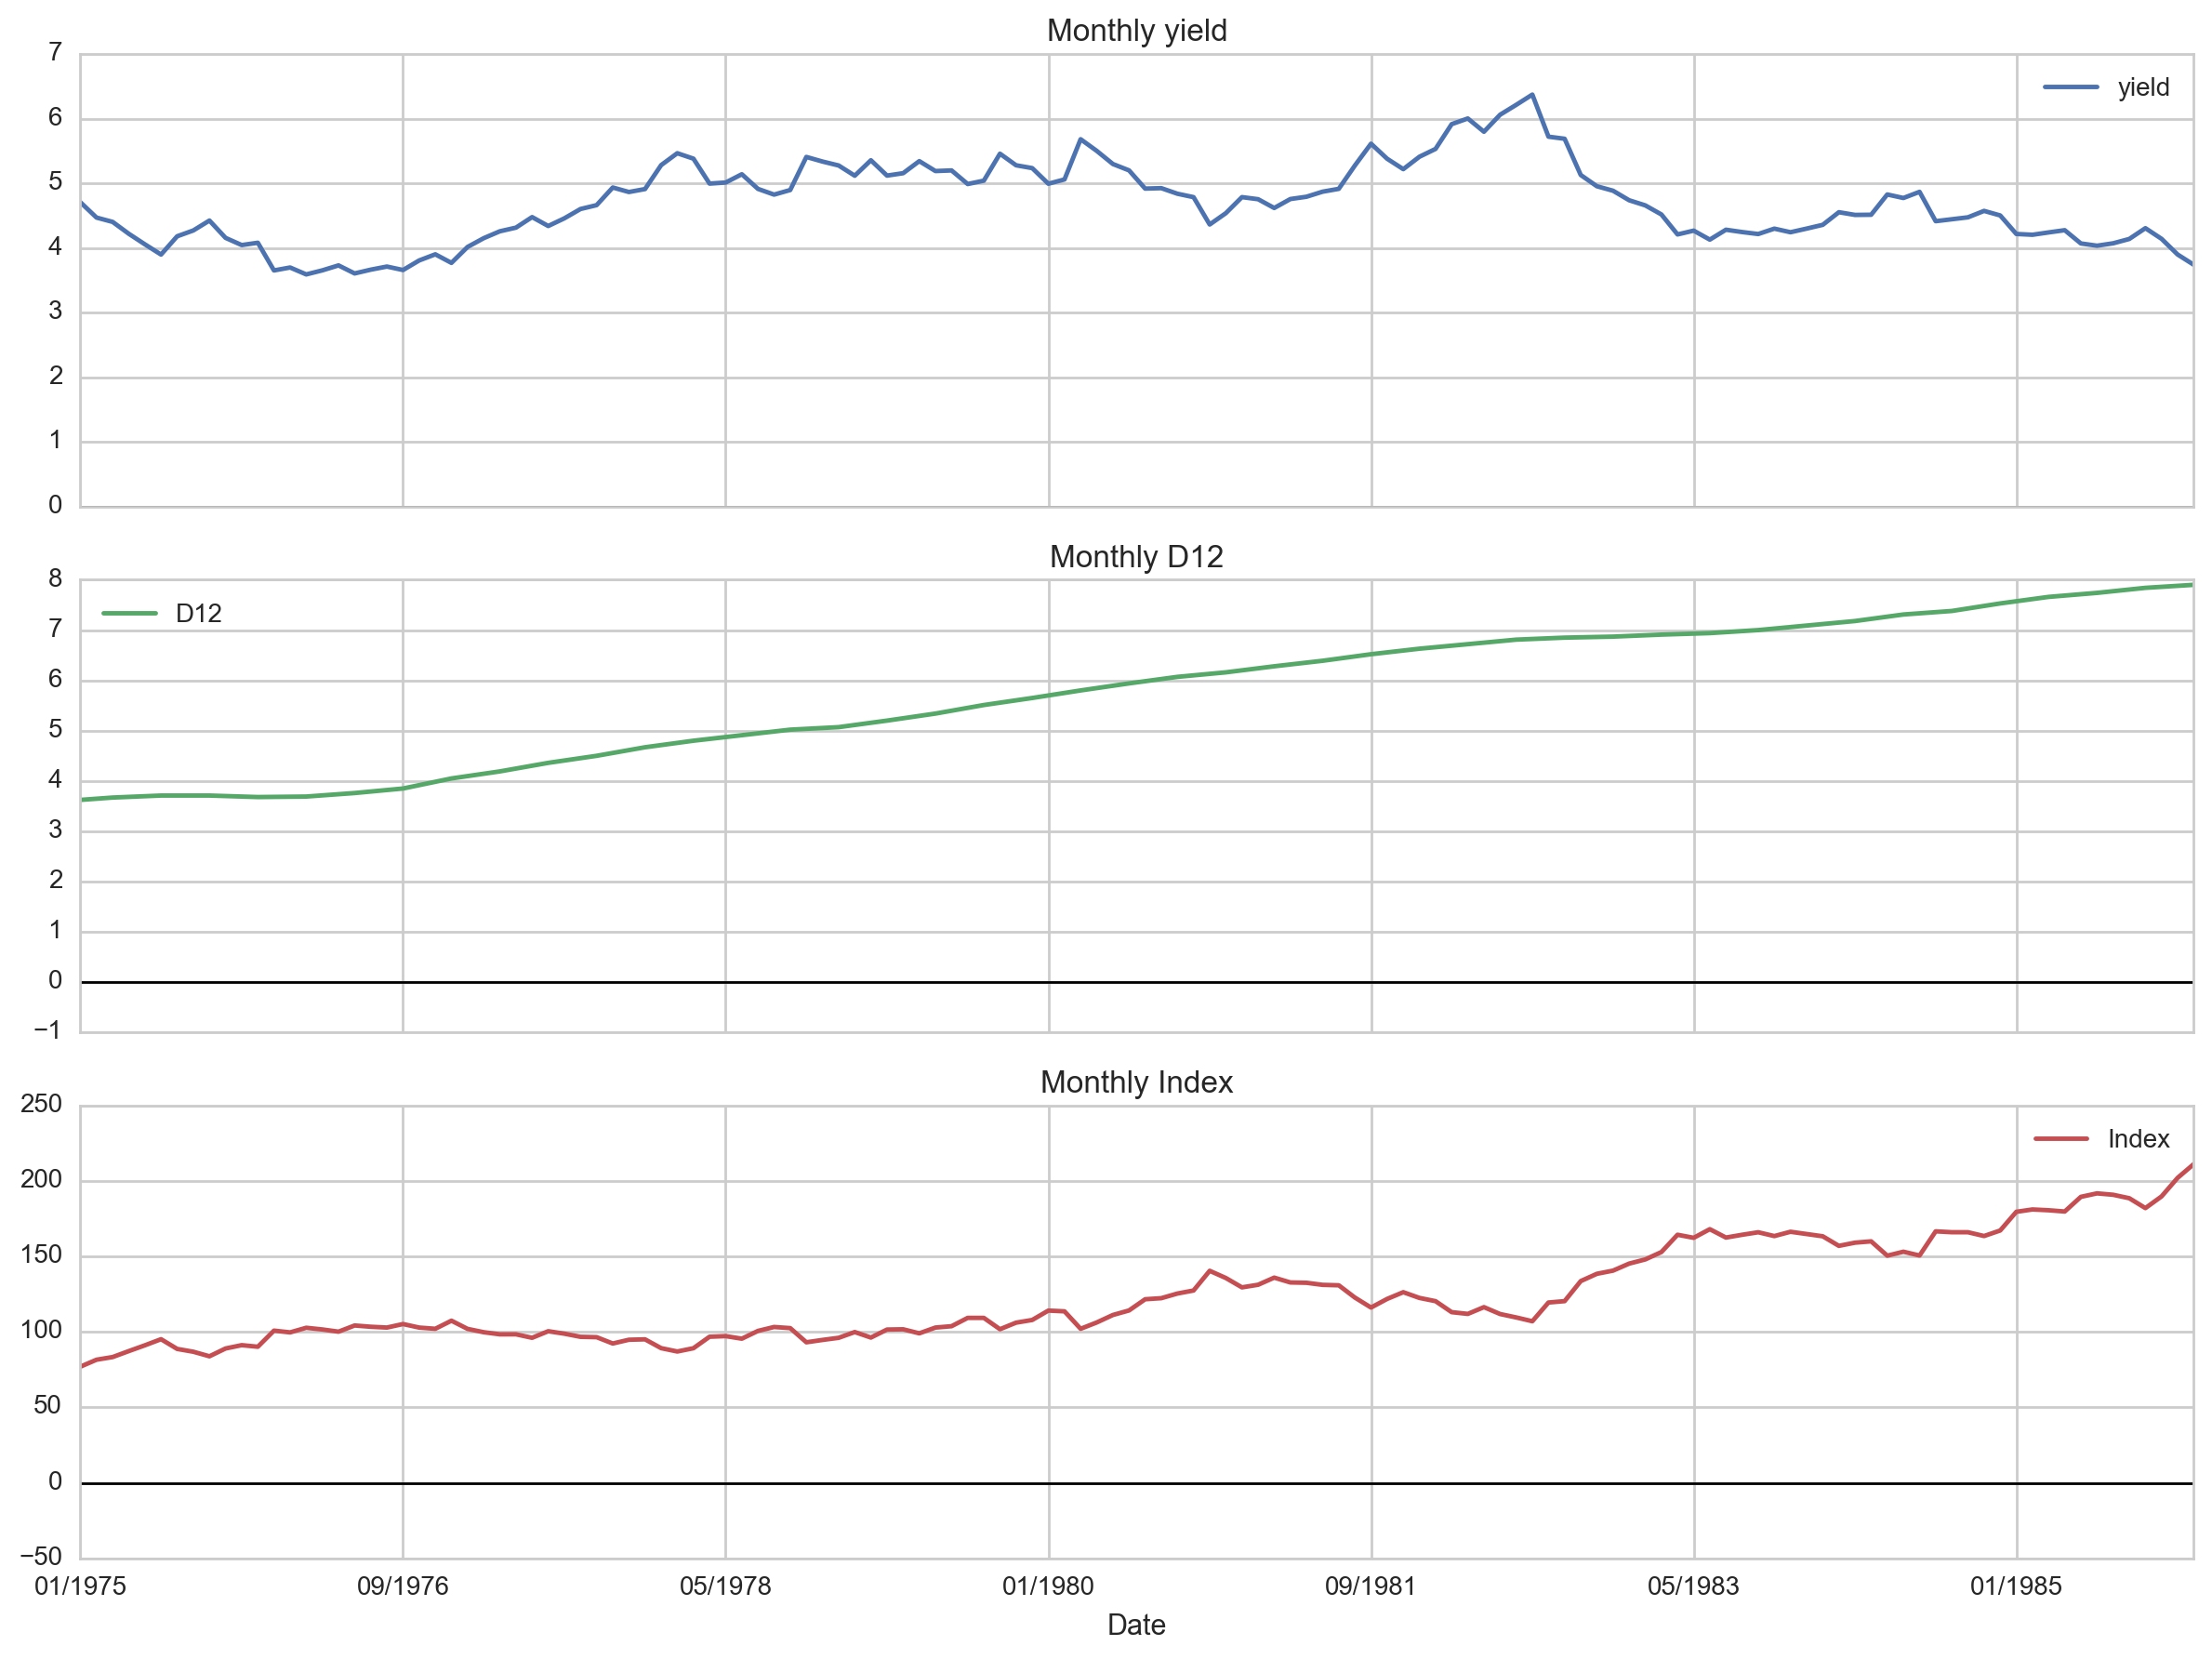

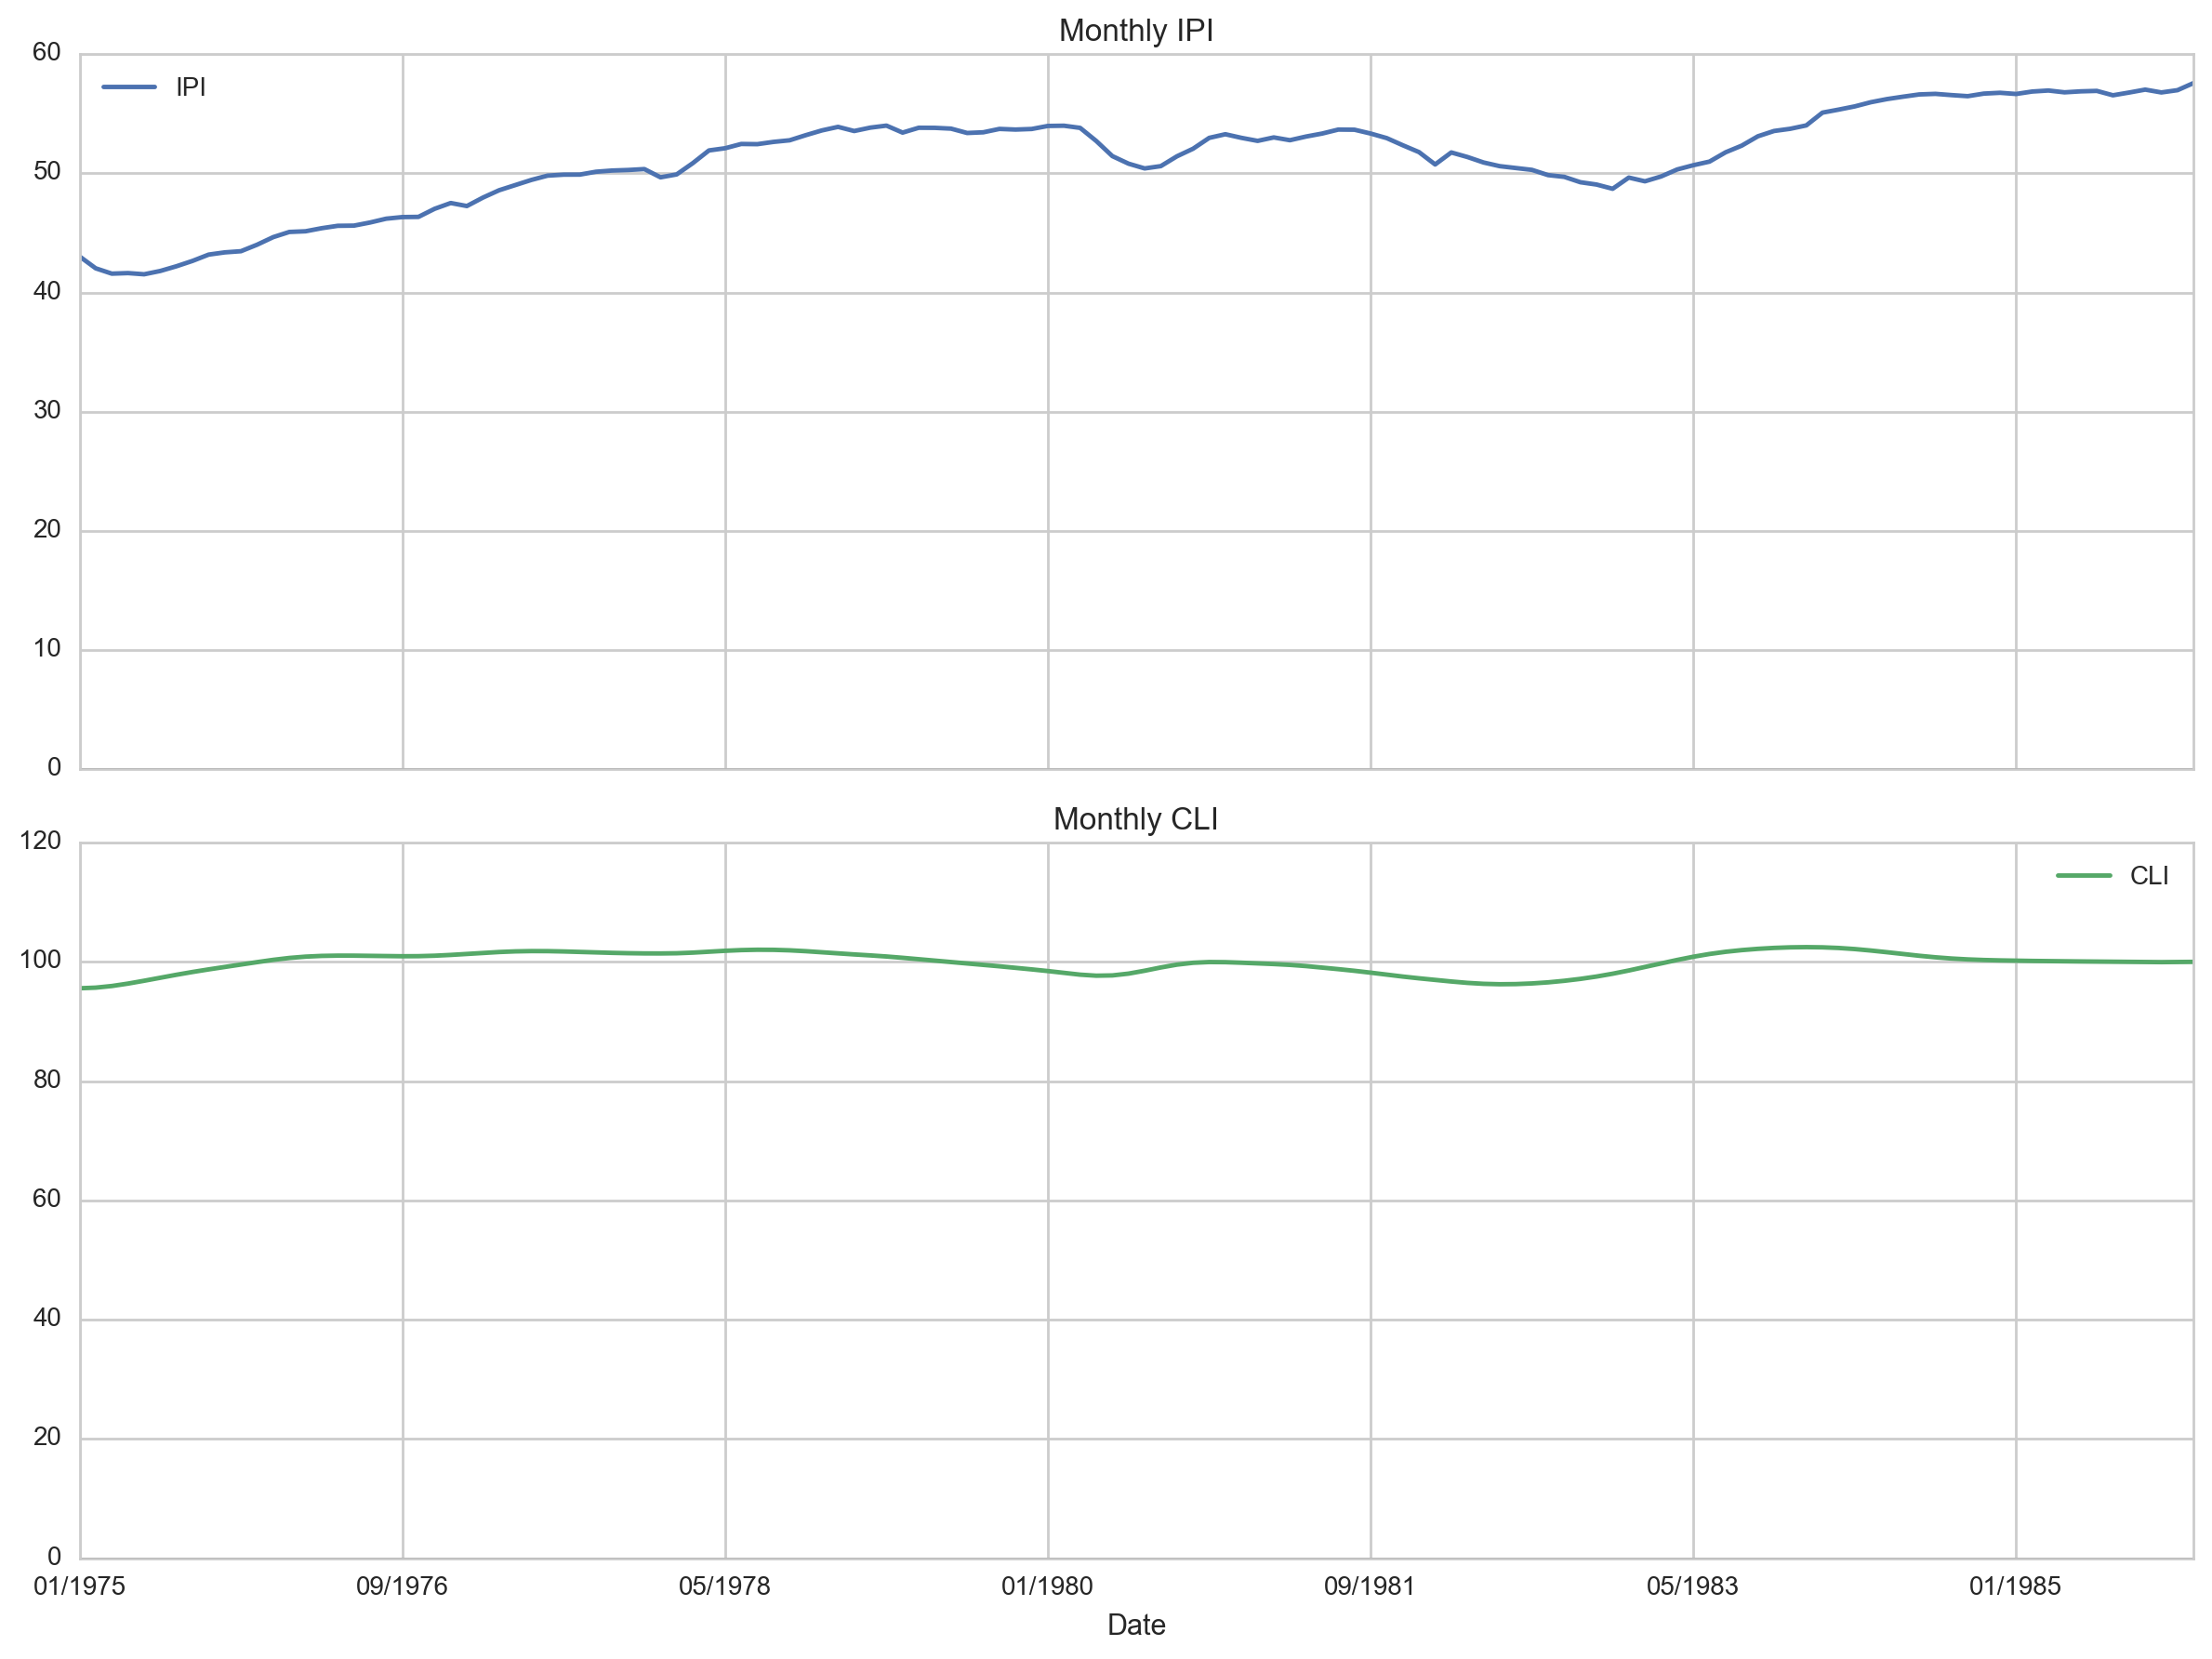

In [17]:
my_plot(volcker, plot_col1)
my_plot(volcker, plot_col2)
my_plot(volcker, plot_col3)
my_plot(volcker, plot_col4)

In [16]:
#Isolate data during Great Recession in 2008 
greatrec = df['01/2003':'12/2013' ]
greatrec.describe()

,Index,D12,AAA,BAA,Rfree,CRSP_SPvw,IPI,CLI,rho,i,def,yield
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,1247.276970,24.427246,0.051008,0.062424,0.001247,0.008308,98.513111,99.828757,0.706153,1.496136,1.141590,1.981684
std,218.013873,4.729480,0.006965,0.008771,0.001447,0.041343,4.473152,1.583804,4.142873,1.736564,0.513689,0.386180
min,735.090000,16.127667,0.034000,0.045100,0.000008,-0.166981,87.412500,94.597700,-16.753933,0.010000,0.620000,1.555569
25%,1106.597500,21.661250,0.048325,0.057575,0.000081,-0.015048,95.635575,99.548558,-1.587925,0.097500,0.877500,1.749860
50%,1251.390000,24.218500,0.053250,0.062700,0.000758,0.013420,99.174500,100.230750,1.178200,0.910000,0.980000,1.886652
75%,1398.527500,27.778500,0.055425,0.066525,0.002298,0.032613,101.887350,100.866200,3.174500,2.757500,1.222500,2.080200
max,1848.360000,34.990000,0.062800,0.092100,0.004192,0.109023,105.729000,101.908300,10.900633,5.030000,3.380000,3.758859


In [21]:
#Variance during Great Recession 
greatrec.var()

Index        47530.049027
D12             22.367977
AAA              0.000049
BAA              0.000077
Rfree            0.000002
CRSP_SPvw        0.001709
IPI             20.009088
CLI              2.508434
rho             17.163402
i                3.015656
def              0.263876
yield            0.149135
dtype: float64

In [22]:
#Correlation Matrix during the Great Recession 
greatrec.corr()

,Index,D12,AAA,BAA,Rfree,CRSP_SPvw,IPI,CLI,rho,i,def,yield
Index,1.000000,0.665931,-0.420646,-0.621905,0.200432,0.134315,0.784067,0.693392,0.127034,0.200432,-0.491593,-0.346875
D12,0.665931,1.000000,-0.528872,-0.277705,-0.177959,-0.075332,0.417503,0.007604,-0.068960,-0.177959,0.242859,0.455812
AAA,-0.420646,-0.528872,1.000000,0.810735,0.491211,-0.145903,-0.096877,-0.003124,-0.162758,0.491211,0.028537,-0.105924
BAA,-0.621905,-0.277705,0.810735,1.000000,0.205672,-0.208976,-0.325147,-0.475920,-0.215726,0.205672,0.608311,0.448145
Rfree,0.200432,-0.177959,0.491211,0.205672,1.000000,-0.042074,0.595046,0.539358,-0.076917,1.000000,-0.314794,-0.383630
CRSP_SPvw,0.134315,-0.075332,-0.145903,-0.208976,-0.042074,1.000000,-0.106275,0.038677,0.999391,-0.042074,-0.159013,-0.249283
IPI,0.784067,0.417503,-0.096877,-0.325147,0.595046,-0.106275,1.000000,0.788003,-0.126840,0.595046,-0.423842,-0.387371
CLI,0.693392,0.007604,-0.003124,-0.475920,0.539358,0.038677,0.788003,1.000000,0.019756,0.539358,-0.808398,-0.803511
rho,0.127034,-0.068960,-0.162758,-0.215726,-0.076917,0.999391,-0.126840,0.019756,1.000000,-0.076917,-0.147686,-0.235364
i,0.200432,-0.177959,0.491211,0.205672,1.000000,-0.042074,0.595046,0.539358,-0.076917,1.000000,-0.314794,-0.383630


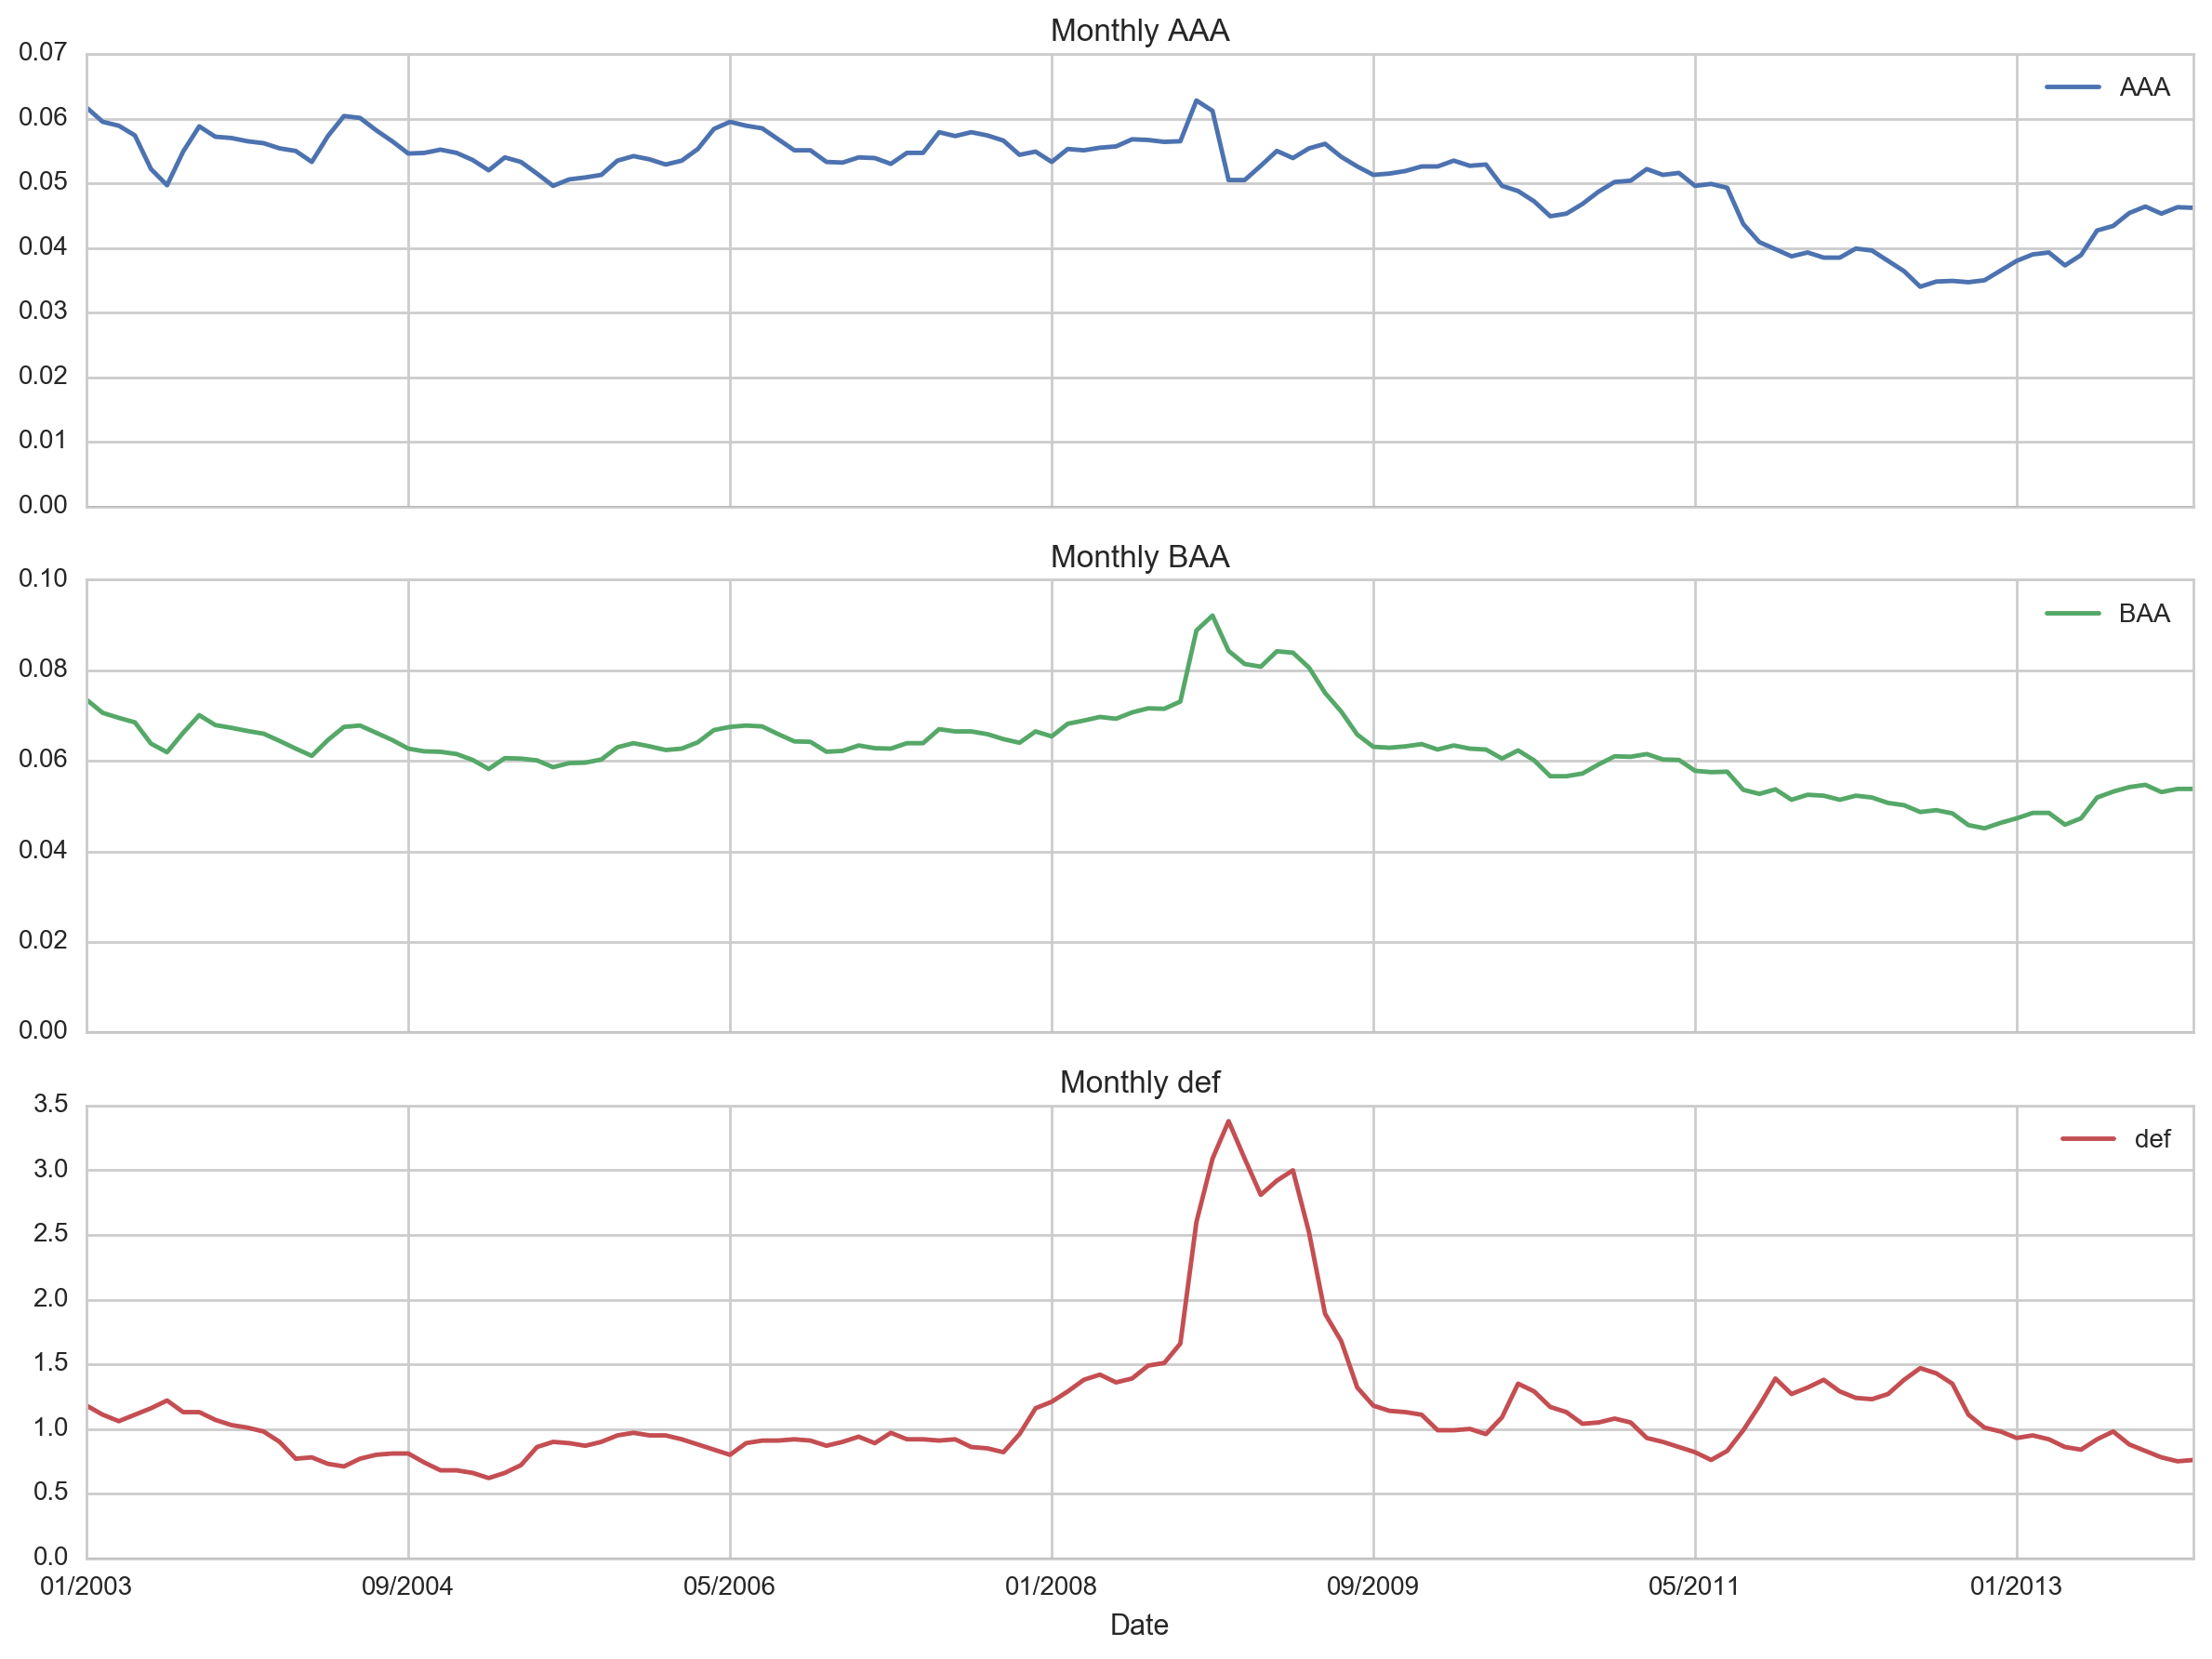

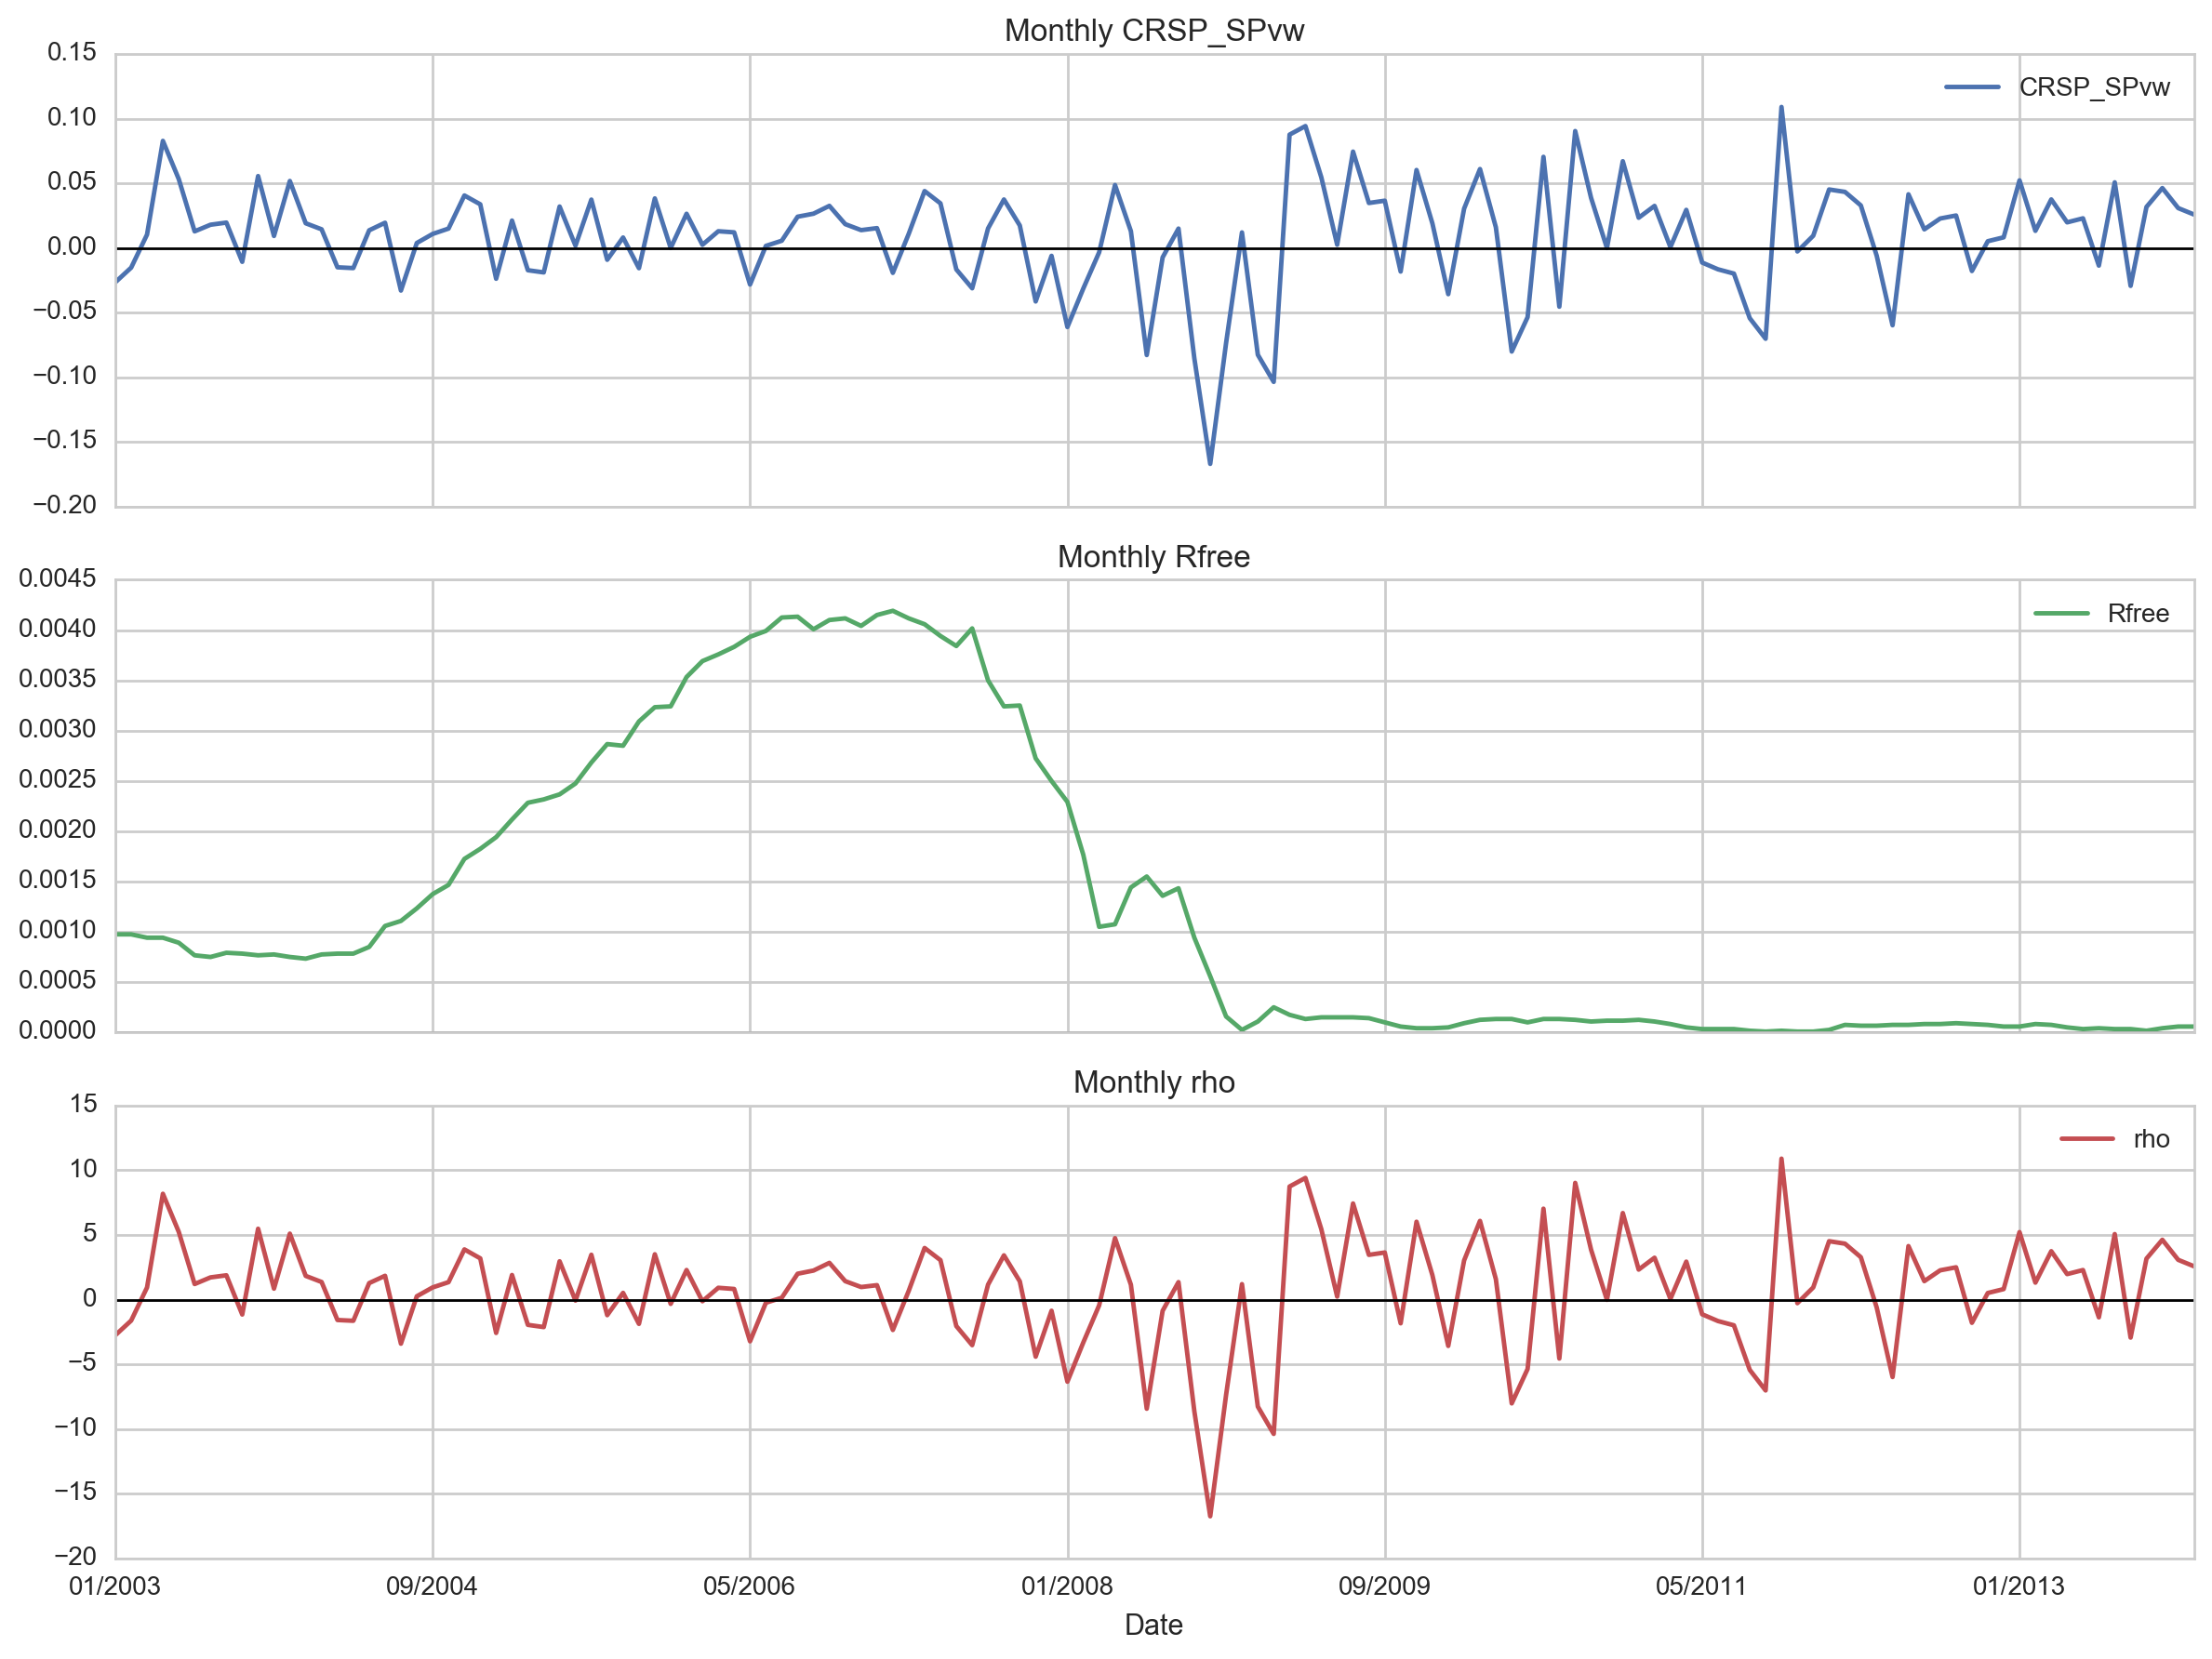

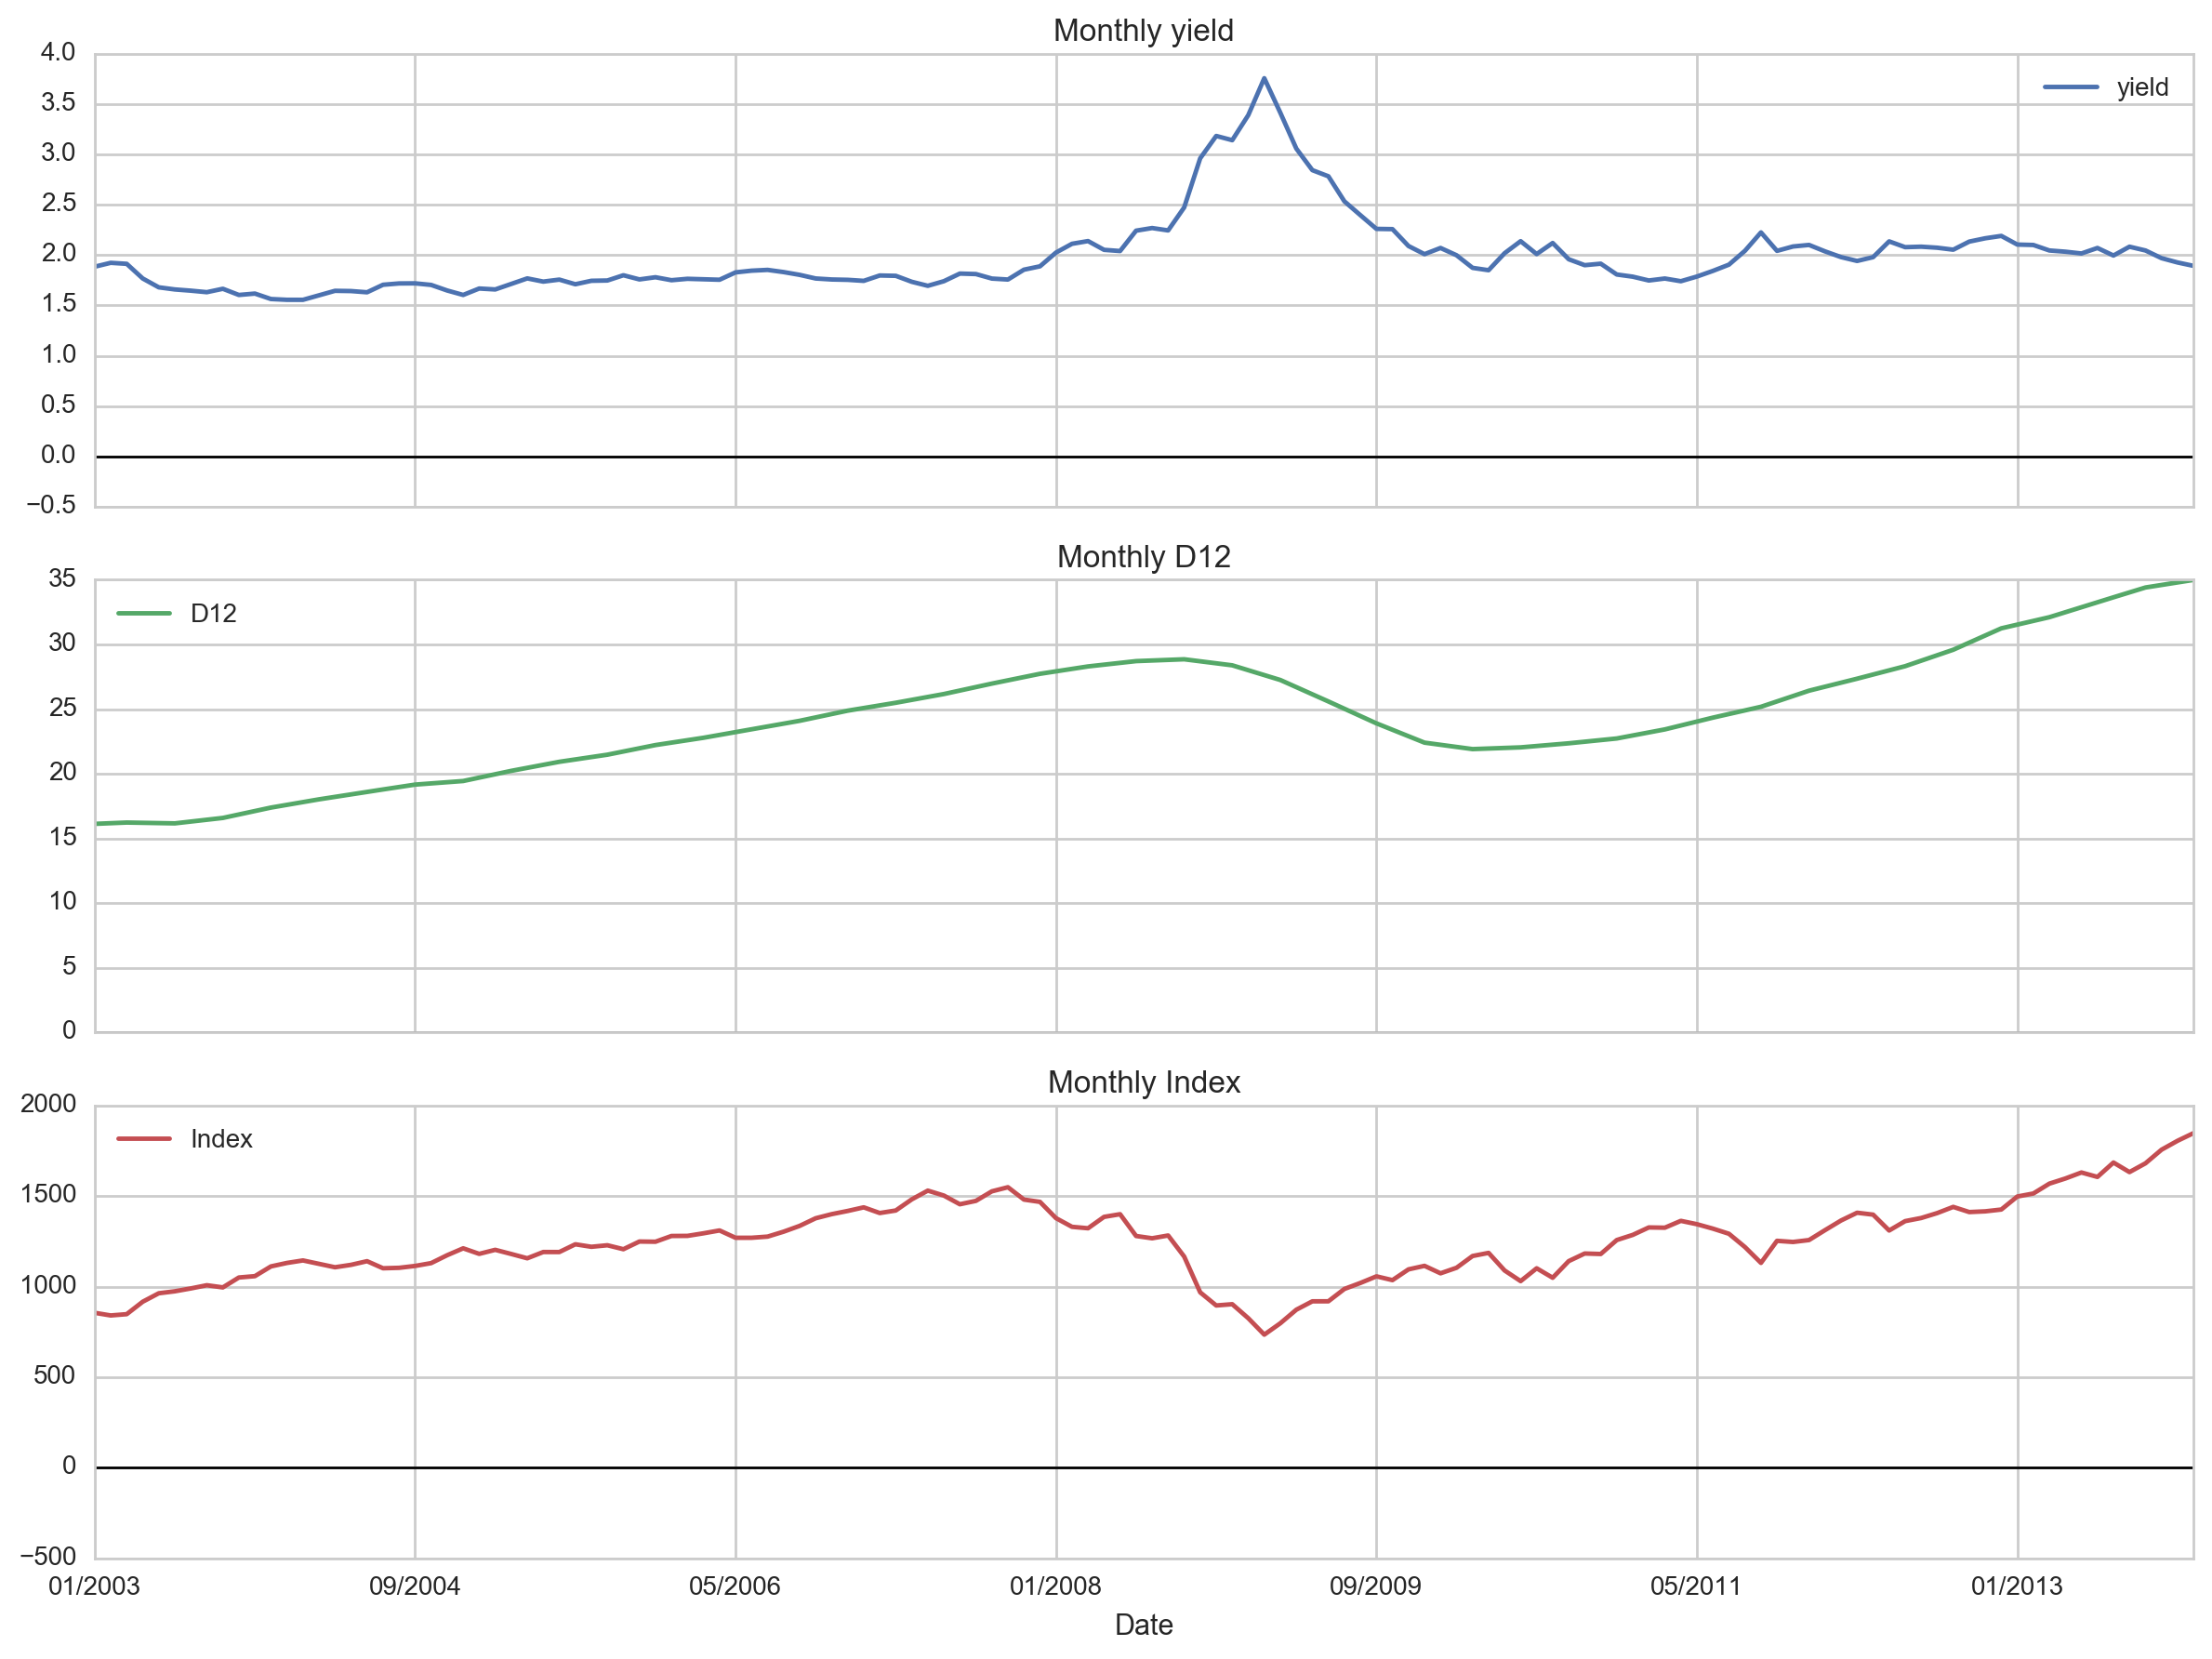

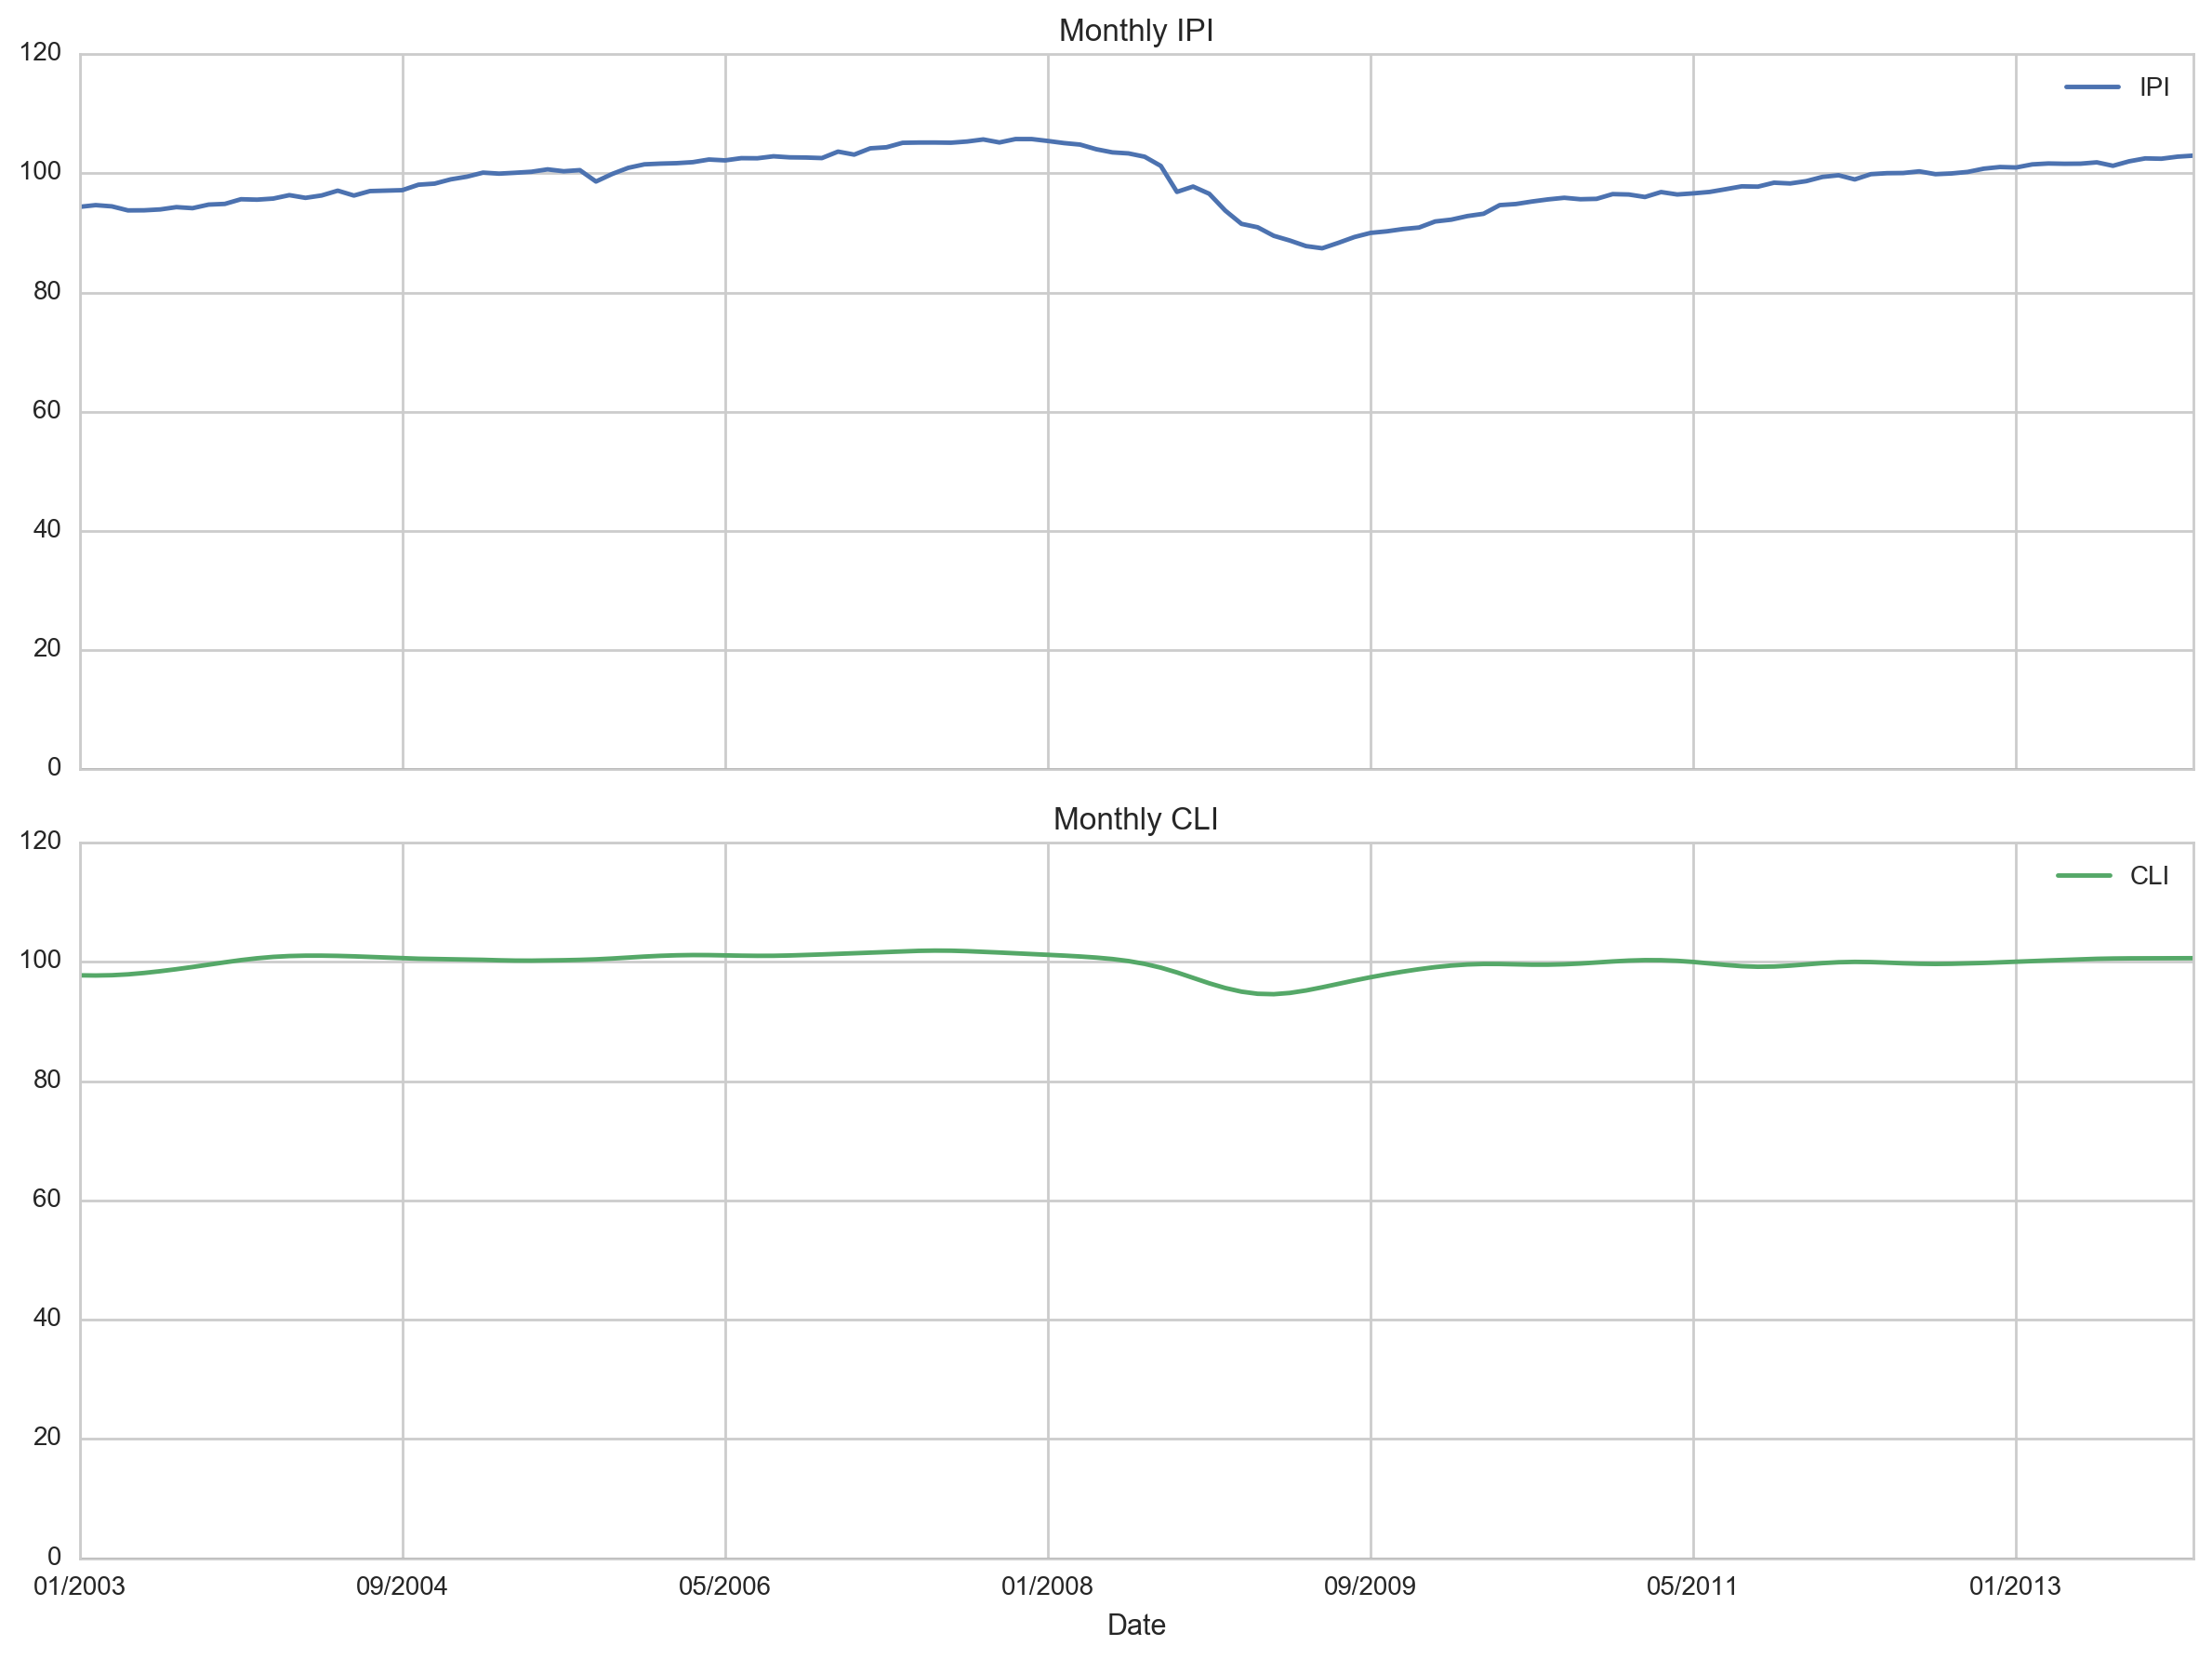

In [18]:
my_plot(greatrec, plot_col1)
my_plot(greatrec, plot_col2)
my_plot(greatrec, plot_col3)
my_plot(greatrec, plot_col4)

The data is analysed from three perspectives. First, the overall data; second, the data 5 years before and after the recession in the late 80's; and lastly, the data 5 years before and after the great recession in 2008. The two recessions were isolated because they were outliers. 

Findings: 
(1) The Composite Index of Leading Indicators (CLI: index used to predict the direction of global economic movements) remained relatively constant, even through economic recessions. This suggests that it may not be an efficient indicator in predicting the direction of global economic movement. 

(2) The Industrial Production Index has had a general upward trend throughout the span of the dataset; Despite the two recessions, the output from manufacturing, mining, electric and gas industries is relatively higher overall. It would be interesting to investigate whether the IPI would be even higher if the two recessions did not occur. 

Also, The IPI was more sensitive to the recessions relative to the CLI. It may be a better indicator in predicting economic movement. 

(3)As expected, the default premium skyrocketed and the excess returns plummeted during the 2008 recession. However, the recession in the late 80s did not reflect changes of the same magnitude. This may be due to hyperinflation. Another variable to further explore may be the inflation rate during the two recessions. 

(4) The risk free rates during the 80s recession and the 2008 recession reflect the polar opposite nature in the ideology that influenced the monetary policy.

(5)Given the time constraint, I was not able to produce Autocorrelation plots of the error terms to determine if successive observations were related. In doing so, further trends and relationships of each variable may have been analyzed rather than overall time periods. (I hope to complete this by the end of the semester) Further analysis of the variance of each variable may have provided better insight as well. 